# Práctica 3: Resolución Numérica  de PVIs  usando Python

Autor: Pedro González Rodelas

Fecha de la primera versión: 01/05/2020

Sucesivas revisiones: 02-08 y 11/05/2020

Fecha de la última revisión: 02/06/2021

En esta práctica se programan en lenguaje Python diferentes métodos numéricos de resolución aproximada de Problemas de Valores Iniciales asociados a Ecuaciones Diferenciales Ordinarias (EDOs) y sistemas de primer orden, provenientes muchos de ellos de problemas y aplicaciones interesantes de Física e Ingeniería.

Algunos de los ejemplos y algoritmos usados en este notebook han sido extraidos, adaptados o traducidos por Pedro González Rodelas de alguno de los siguientes libros y/o apuntes:


- "Análisis Numérico con Mathematica" de V. Ramírez, D. Barrera, M. Pasadas y P. González. Edit. Ariel Ciencia (2001) con ISBN: 84-344-8036-0. Dep. Legal: B.31.425-2001.

- Apuntes de la asignatura de Métodos Numéricos II del Grado de Matemáticas y Dobles Grados de Matemáticas e Informática o Física de la UGR, de los profesores José Martínez Aroza y Victoriano Ramírez González.

- Notebook perteneciente al Capítulo 9 del libro [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9) de Robert Johansson.

- Capítulo 7 del libro [Numerical Methods in Engineering with Python 3](https://www.cambridge.org/core/books/numerical-methods-in-engineering-with-python-3/95151C37C2F427F30DC90FA619FE79F9) de Jaan Kiusalaas.

In [1]:
# Cargando el fichero version_information.py
# alojado el directorio de trabajo actual
# podremos comprobar las versiones concretas
# tanto del intérprete de Python, como de los
# módulos que tenemos instalados en nuestro ordenador.

%reload_ext version_information

%version_information numpy, matplotlib, sympy, scipy

Software versions
Python 3.11.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
numpy 1.26.4
matplotlib 3.8.4
sympy 1.12
scipy 1.13.0
Tue May 21 23:06:41 2024 Hora de verano romance

## Resolviendo EDOs simbolicamente con SymPy

Como es bien sabido, una ecuación diferencial ordinaria (EDO), no es más que una relación existente entre algunas derivadas de función incógnita $y(t)$, suponiendo que resulta ser suficientemente derivable, a partir de la función $f\equiv f(t,z)$ que determina la EDO que satisface. 

En el caso de una EDO de primer orden esta relación se podría escribir de la siguiente manera genérica: $$y'(t)=f(t,y(t)),\; t\in[a,b]$$
con $f:[a,b]\times\mathbb{R}\to \mathbb{R}$ también suficientemente regular, o al menos continua en $(t,z)$ y Lipschitziana en $z$, para asegurar existencia y unicidad de solución del correspondiente Problema de Valores Iniciales (PVI), para cierta condición inicial $y(a) = y_a\equiv\mu\in\mathbb{R}$ determinada de antemano:

$$\begin{array}{c l} y'(t)=f(t,y(t)),& t\in[a,b]\\ y(a) = y_a\equiv\mu  &  \end{array}$$

aunque también suele ser habitual el empleo de la siguiente notación

$$\begin{array}{c l} x'(t)=f(t,x(t)),& t\in[a,b]\\ x(a) = x_0\equiv\mu  &  \end{array}$$

o usar $x$ como variable independiente e $y$ como variable dependiente, etc. 

Así pues, con el objeto de normalizar la notación y que valga para cualquier caso, hemos optado por usar una notación genérica que valga para cualquier EDO, independientemente de la notación empleada para la misma.

In [2]:
import sympy as sp
# sp.init_printing()

In [3]:
t, y0, z = sp.symbols('t, y_0,  z')
def f(t,z):
    return z

In [4]:
a = 0; b = 1;   # extremos inferior y superior del intervalo 
ya = 1          # condición inicial del PVI

In [5]:
# Vamos a empezar definiendo la Ec. Dif. Ordinaria (edo) a resolver
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)

Eq(-y(t) + Derivative(y(t), t), 0)

In [6]:
# y la resolvemos simbólicamente mediante la orden dsolve de SymPy
edo_sol = sp.dsolve(edo)
edo_sol

Eq(y(t), C1*exp(t))

In [7]:
# De esta solución simbólica obtenida también podremos extraer, tanto
edo_sol.lhs  #  el término de la izquierda (mediante .lhs)

y(t)

In [8]:
edo_sol.rhs  #  como el término de la derecha (mediante .rhs)

C1*exp(t)

In [9]:
# Veámos ahora cómo imponer las condiciones iniciales a través
ics = {y(0): y0}  #  de una entrada de diccionario
ics

{y(0): y_0}

In [10]:
# De esta manera haríamos la sustituciones correspondientes
edo_sol.rhs.subs(t, 0),edo_sol.lhs.subs(t, 0).subs(ics)

(C1, y_0)

In [11]:
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
CI_eq   # esta sería finalmente la ecuación asociada 
# a la imposición de la condición inicial del PVI

Eq(y_0, C1)

In [12]:
CI_sol = sp.solve(CI_eq) # que resolvemos mediante la orden solve
CI_sol[0]                # y extraemos la única solución de ésta

{C1: y_0}

In [13]:
edo_sol   # Usaremos finalmente la solución analítica general

Eq(y(t), C1*exp(t))

In [14]:
# así como la obtención de las constantes de integración
edo_sol.subs(CI_sol[0]) # en función de las condiciones iniciales

Eq(y(t), y_0*exp(t))

In [15]:
# para obtener la única solución exacta de nuestro PVI 
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
sol_exacta

exp(t)

### Función genérica para aplicar las condiciones  iniciales de un PVI

Podríamos implementar ahora de una manera sistemática esta técnica de obtención simbólica de la solución analítica de un PVI, aprovechando al máximo la potencia y flexibilidad que nos aporta el lenguaje Python, así como su módulo de cálculo simbólico por excelencia SymPy.

In [16]:
def apply_ics(sol, ics, x, known_params):
    """
    Applicamos las condiciones iniciales (CIs), dadas como un diccionario
    de la forma ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    a la solución de la EDO con en la variable independiente x.
    Las constantes de integración indeterminadas C1, C2, ... serán extraidas
    a partir de los símbolos libres de la solución de la EDO, excluyendo 
    aquellos de la lista de parametros conocidos 'known_params'.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

## Importación del módulo NumPy

La importación de este módulo será completamente imprescindible en casi todas las implementaciones desarrolladas a lo largo de esta práctica, al ser el módulo de Python fundamental para cualquier empleo eficiente de métodos numéricos en este lenguaje de programación; pero también resultará útil para la obtención de los arrays de abcisas y ordenadas de cualquier gráfico obtenido al estilo de MATLAB u Octave.

In [17]:
# Como es habitual realizaremos la importación con el pseudónimo np
import numpy as np  

## Representación gráfica de las soluciones

In [18]:
# Configuramos e importamos el submódulo Pyplot de Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [19]:
sol_exacta # recordamos cuál era la solución exacta de nuestro PVI

exp(t)

In [20]:
# para poder evaluarla en el valor de la variable independiente 
sol_exacta.subs({t:1}).evalf()  # t que queramos

2.71828182845905

In [21]:
print(sol_exacta)  # esta es la expresión que podríamos pegar donde queramos

exp(t)


In [22]:
a,b    # el intervalo de trabajo

(0, 1)

In [23]:
m = sol_exacta.subs({t:a})  # valores de referencia a la izqda.
M = sol_exacta.subs({t:b})  # y derecha del intervalo

In [24]:
# para representar gráficamente expresiones simbólicas
sp.plot?

In [25]:
# graf_sympy = sp.plot(sol_exacta, xlim =(a,b), ylim = (0,M));

In [26]:
# en caso de que queramos extender este gráfico simbólico con otro 
# graf_sympy.append(sp.plot(t,(t,a,b),show=False)[0])
# graf_sympy.show()

Aunque siempre tendremos la posibilidad de hacerlo de la manera tradicional habitual en MATLAB u Octave, pero esto requeriría reconvertir previamente esta solución analítica, dada simbólicamente, en una función numérica, evaluable de manera vectorial en arrays de valores, como por ejemplo las abcisas de la variable independiente en los que queramos obtener sus correspondientes ordenadas.

In [27]:
# Esta sería la herramienta adecuada para realizar dicha conversión
y_x = sp.lambdify(t, sol_exacta, 'numpy')

In [28]:
xx = np.linspace(a, b, 100) # así obtendríamos el array de abcisas

In [29]:
y_x(xx)   # y así el correspondiente array de ordenadas

array([1.        , 1.0101522 , 1.02040746, 1.03076684, 1.04123139,
       1.05180218, 1.06248028, 1.07326679, 1.0841628 , 1.09516944,
       1.10628782, 1.11751907, 1.12886434, 1.1403248 , 1.1519016 ,
       1.16359593, 1.17540899, 1.18734197, 1.1993961 , 1.21157261,
       1.22387273, 1.23629773, 1.24884887, 1.26152743, 1.2743347 ,
       1.287272  , 1.30034064, 1.31354196, 1.32687729, 1.34034801,
       1.35395549, 1.36770112, 1.38158629, 1.39561243, 1.40978096,
       1.42409333, 1.43855101, 1.45315546, 1.46790818, 1.48281068,
       1.49786447, 1.51307108, 1.52843208, 1.54394902, 1.5596235 ,
       1.5754571 , 1.59145146, 1.60760818, 1.62392894, 1.64041539,
       1.65706921, 1.6738921 , 1.69088579, 1.70805199, 1.72539247,
       1.742909  , 1.76060336, 1.77847735, 1.7965328 , 1.81477156,
       1.83319548, 1.85180644, 1.87060634, 1.88959711, 1.90878067,
       1.92815899, 1.94773404, 1.96750782, 1.98748235, 2.00765966,
       2.02804182, 2.0486309 , 2.06942901, 2.09043826, 2.11166

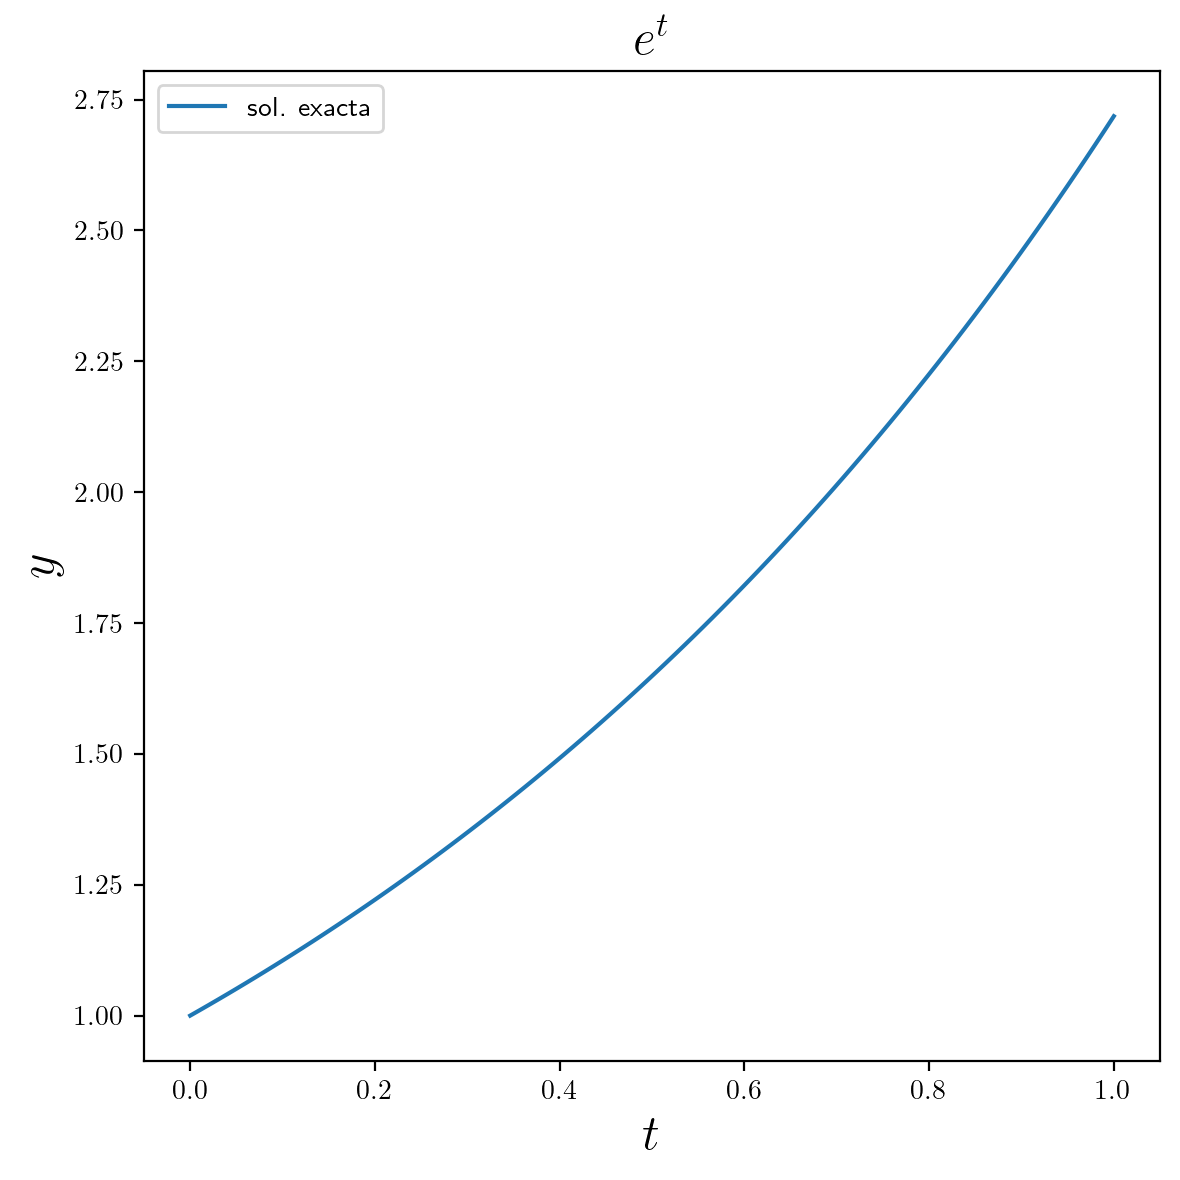

In [30]:
# y ya estaría todo preparado para poder realizar la correspondiente
fig, ax = plt.subplots(figsize=(6, 6))  # figura de Matplotlib
xx = np.linspace(a, b, 100)
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"$%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

In [31]:
graf_exacta = fig  # de esta manera podremos volver a generar esta figura
# cuando lo necesitemos, por ejemplo para compararla con las aproximaciones

## Módulo de impresión de resultados numéricos

Como posteriormente vamos a necesitar imprimir y/o mostrar los resultados obtenidos mediante la aplicación de diferentes métodos numéricos, hemos optado por definir una herramienta común que grabaremos en un fichero .py, que usaremos a modo de módulo particular, que nos permitirá usarlo repetidamente de una manera sistemática, y no tener que volver a repetir esta porción de código cada vez que lo necesitemos a lo largo de la práctica.

In [32]:
%pwd  # para saber en qué directorio estamos trabajando

'C:\\Users\\Julian\\Desktop\\MNII\\Material Alberto\\Prácticas PRADO\\03 PVI'

Vemos que con estos denominados comandos ``mágicos`` (precedidos de `%`) podemos interactuar con el sistema operativo en el que estemos ejecutando este notebook, para conocer en qué directorio nos encontramos, listar, borrar o crear nuevos archivos, cambiar de directorio, etc., como veremos a continuación.  

In [33]:
%%file printSoln.py
## module printSoln
''' imprimeSol(X,Y,freq).
    Imprime los arrays X e Y devueltos por los códigos
    de resolución de una ecuación diferencial concreta
    usando una frecuencia de salida especificada, 'freq'.
        freq = n imprime cada n pasos.
        freq = 0 imprime sólo los valores inicial y final.
'''
def printSoln(X,Y,freq):

    def printHead(n):
        print("\n        x  ",end=" ")
        for i in range (n):
            print("      y[",i,"] ",end=" ")
        print()

    def printLine(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range (n):
            print("{:13.4e}".format(y[i]),end=" ")
        print()
    
    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)
    if i != m - 1: printLine(X[m - 1],Y[m - 1],n)


Writing printSoln.py


In [34]:
# comprobamos a continuación que efectivamente se ha creado dicho archivo
%ls *.py

 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: FAFB-E5F4

 Directorio de C:\Users\Julian\Desktop\MNII\Material Alberto\Prácticas PRADO\03 PVI

17/05/2024  13:00               886 AdamBashforth2.py
17/05/2024  13:00             2.481 EjemploAplicacion.py
17/05/2024  13:00             2.593 EjemploAplicacionEulerimplyptomedio.py
17/05/2024  13:00               668 euler.py
17/05/2024  13:00               668 eulerexplicito.py
17/05/2024  13:00               461 eulerexplrapido.py
17/05/2024  13:00               841 eulerimplicito.py
17/05/2024  13:00               820 eulerimplicitoaprox.py
21/05/2024  23:06               918 printSoln.py
17/05/2024  13:00               697 ptomedio.py
17/05/2024  13:00               971 RK4.py
17/05/2024  13:00               959 Taylor2.py
17/05/2024  13:00             6.033 version_information.py
              13 archivos         18.996 bytes
               0 dirs  295.695.532.032 bytes libres




# Métodos de Euler

In [35]:
%%file   eulerexplicito.py
## módulo euler
''' método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)

Overwriting eulerexplicito.py


In [36]:
# para usar el código anterior guardado en el fichero eulerexplicito.py
import eulerexplicito

In [37]:
# Si posteriormente tuviéramos que volver a importarlo, con Pyhton 3
# import importlib    # necesitaríamosimportar previamente este módulo
# importlib.reload(module)
# importlib.reload(eulerimplicito) # y ya podríamos cargarlo de nuevo cuando queramos

In [38]:
%ls eulerexplicito.py

 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: FAFB-E5F4

 Directorio de C:\Users\Julian\Desktop\MNII\Material Alberto\Prácticas PRADO\03 PVI

21/05/2024  23:06               668 eulerexplicito.py
               1 archivos            668 bytes
               0 dirs  295.695.527.936 bytes libres


In [39]:
help(eulerexplicito)

Help on module eulerexplicito:

NAME
    eulerexplicito

DESCRIPTION
    método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.

FUNCTIONS
    integrate(F, x0, y0, xfinal, N)

FILE
    c:\users\julian\desktop\mnii\material alberto\prácticas prado\03 pvi\eulerexplicito.py




In [40]:
# Apliquemos pues ahora este algoritmo del método de Euler explícito
N=10;  # con un valor concreto de N y la función f que define nuestra EDO
xx, yEulerexpl = eulerexplicito.integrate(f,a,ya,b,N)
# y asignémosle los arrays que devuelve a las abcisas y ordenadas

In [41]:
print(yEulerexpl)  #  aprox. obenidas en los nodos considerados

[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]


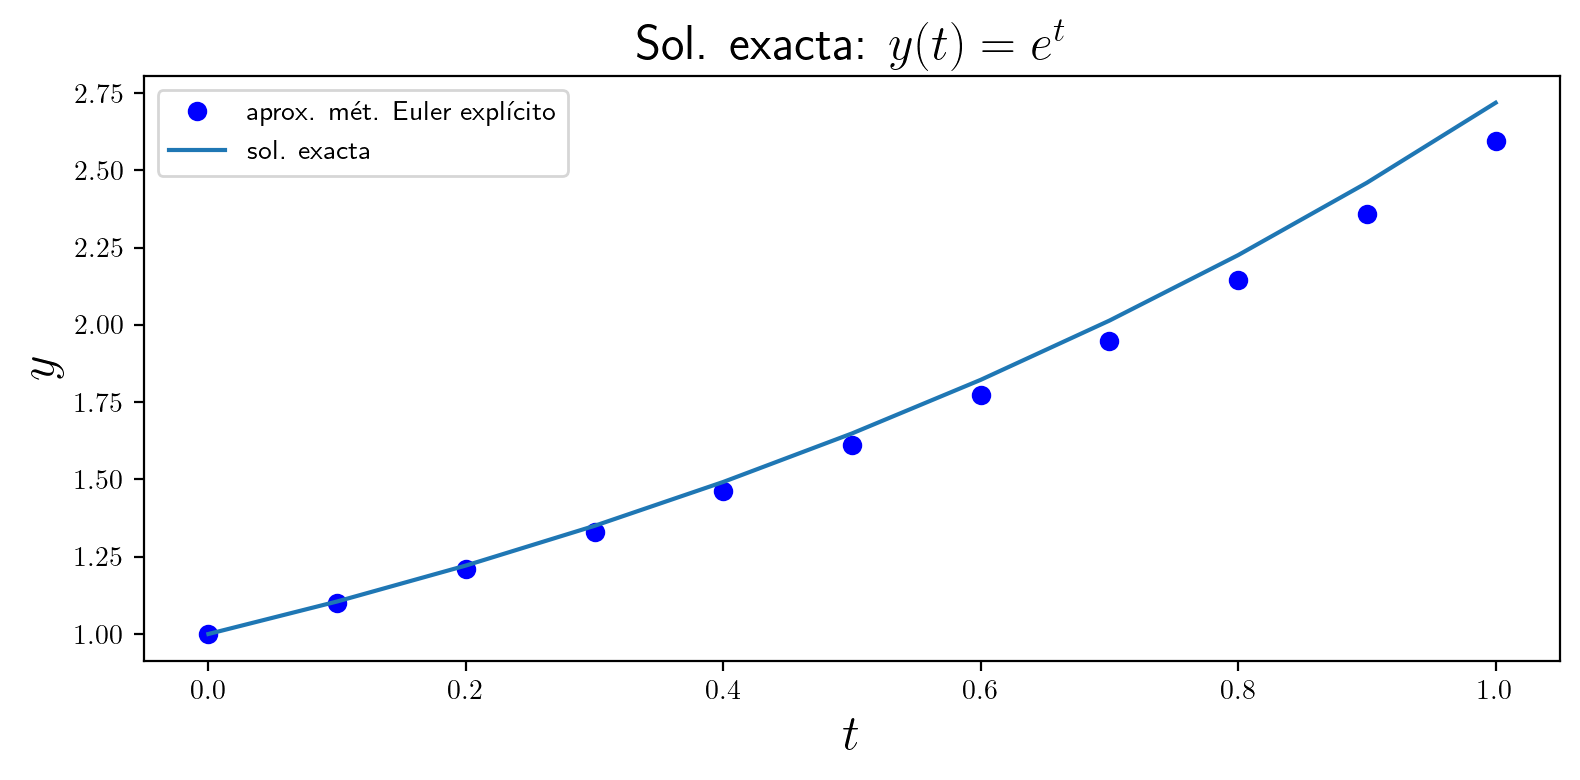

In [42]:
# que justo a continuación podremos dibujar y comparar con la sol. exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerexpl, 'bo',label = "aprox. mét. Euler explícito")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

In [43]:
%%file eulerimplicito.py
## módulo eulerimplicito
''' método de Euler implicito para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
import sympy as sp
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    y1 = sp.Symbol('y1') # usaremos esta variable como incógnita
    for n in range(N):   # de la ecuación a resolver en cada iteración
        Y.append(sp.solve(Y[n]+h*F(X[n+1],y1)-y1,y1)[0])
    return np.array(X),np.array(Y)

Overwriting eulerimplicito.py


In [44]:
import eulerimplicito  # así importaríamos el contenido guardado en euler.py

In [45]:
%%file eulerimplicitoaprox.py
## módulo eulerimplicitoaprox
''' método de Euler implicito aprox para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
import sympy as sp

def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    for n in range(N):   
        y1 = Y[n] + h*F(X[n],Y[n])    #  valor inicial para una
        Y.append(Y[n]+h*F(X[n+1],y1)) #  iteración de punto fijo
    return np.array(X),np.array(Y)

Overwriting eulerimplicitoaprox.py


In [46]:
# %ls euler*.py

In [47]:
import eulerimplicitoaprox  # así importaríamos el contenido guardado en euler.py

In [48]:
# Si posteriormente tuviéramos que volver a importarlo, con Pyhton 3
# import importlib    # necesitaríamosimportar previamente este módulo
# importlib.reload(module)
# importlib.reload(eulerimplicito) # y ya podríamos cargarlo de nuevo cuando queramos

In [49]:
# Apliquemos pues ahora alguna de estas versiones del algoritmo 
N=10;  # del método de Euler implícito, con un valor concreto de n
xx, yEulerimpl = eulerimplicito.integrate(f,a,ya,b,N)
xx, yEulerimplaprox = eulerimplicitoaprox.integrate(f,a,ya,b,N)
# y asignémosle los arrays que devuelve a las abcisas y ordenadas

In [50]:
print(yEulerimpl)  #  aprox. obenidas en los nodos considerados

[1 1.11111111111111 1.23456790123457 1.37174211248285 1.52415790275873
 1.69350878084303 1.88167642315892 2.09075158128769 2.32305731254188
 2.58117479171320 2.86797199079244]


In [51]:
print(yEulerimplaprox)  #  aprox. obenidas en los nodos considerados

[1.         1.11       1.2321     1.367631   1.51807041 1.68505816
 1.87041455 2.07616015 2.30453777 2.55803692 2.83942099]


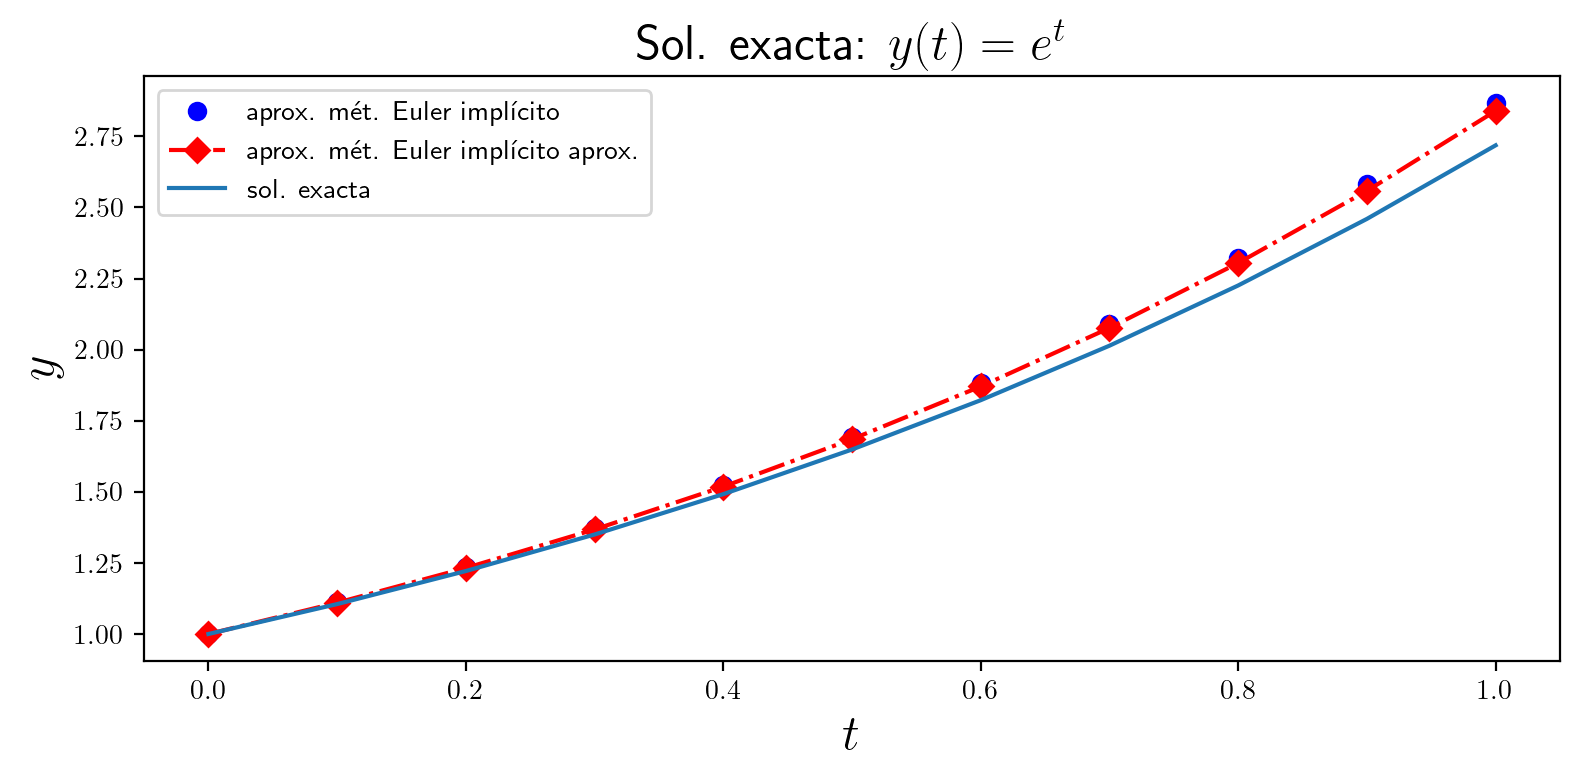

In [52]:
# que justo a continuación podremos dibujar y comparar con la sol. exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yEulerimpl, 'bo',label = "aprox. mét. Euler implícito")
ax.plot(xx,yEulerimplaprox, 'r-.D',label = "aprox. mét. Euler implícito aprox.")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerimpl = fig

In [53]:
# Al haberle puesto nombre a esta gráfica podremos volver a reproducirla
# graf_Eulerimpl     # sin más que acordarnos de su nombre

## Comparativa entre los métodos de Euler explícito e implícito

In [54]:
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])
print(valores_exactos)

[1 1.10517091807565 1.22140275816017 1.34985880757600 1.49182469764127
 1.64872127070013 1.82211880039051 2.01375270747048 2.22554092849247
 2.45960311115695 2.71828182845905]


In [55]:
abs(valores_exactos - yEulerexpl).max() # este sería el valor absoluto 
# máximo de las diferencias entre los valores exactos y los aproximados 
# mediante el uso del método de Euler explícito

0.124539368359045

In [56]:
abs(valores_exactos - yEulerimpl).max() # este sería el valor absoluto 
# máximo de las diferencias entre los valores exactos y los aproximados 
# mediante el uso del método de Euler implícito

0.149690162333396

In [57]:
abs(valores_exactos - yEulerimplaprox).max() # este sería el valor absoluto 
# máximo de las diferencias entre los valores exactos y los aproximados 
# mediante el uso del método de Euler implícito

0.121139157609972

**Ejercicios:**
1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 
1. A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

**Nota importante:** en caso de necesitar una sóla iteración (o el valor $y_1$) del método que fuera entonces convendría adaptar los algoritmos anteriores, así como todos los que vienen a continuación, para que por ejemplo introducidos `(f,a,ya,b,N)` tan sólo calculen y devuelvan `Y[1]` o directamente `y1`, con el corespondiente ahorro de tiempo de cómputo. Ver ejemplo a continuación.

In [58]:
%%file eulerexplrapido.py
## módulo eulerexplrapido
''' método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,x1,h).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1]}.
    x0,y0   = condiciones iniciales 
    x1      = valor final de la variable x0 + h en este caso
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario
'''
import numpy as np
def integrate(F,x0,y0,h):    
    return y0 + h*F(x0,y0)

Overwriting eulerexplrapido.py


In [59]:
import eulerexplrapido

Habría una posibilidad de intentar estimar el tiempo de CPU empleado 

In [60]:
import timeit

In [61]:
N = 10; h = (b-a)/N
%time
eulerexplrapido.integrate(f,a,ya,h)

CPU times: total: 0 ns
Wall time: 0 ns


1.1

In [62]:
%%timeit
eulerexplrapido.integrate(f,a,ya,h)

357 ns ± 52.9 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [63]:
%time
eulerexplicito.integrate(f,a,ya,b,N)

CPU times: total: 0 ns
Wall time: 0 ns


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.1       , 1.21      , 1.331     , 1.4641    ,
        1.61051   , 1.771561  , 1.9487171 , 2.14358881, 2.35794769,
        2.59374246]))

In [64]:
%%timeit
eulerexplicito.integrate(f,a,ya,b,N)

41.5 µs ± 964 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Al usar `%time` el intérprete de Python nos intenta devolver el tiempo empleado en la ejecución de dicho comando (o linea de comandos), pero esto suele depender muchas veces de la carga puntual de la CPU en ese justo momento de la ejecución; por ese motivo se suele preferir el uso del comando mágico `%%timeit` que lo que hace más bien es realizar una tanda de ejecuciones repetitivas de dicha linea o bloque de comandos, tantas veces como sea necesario para obtener un valor estimado promedio, que es el que nos devuelve seguidamente. Habrá que tener en cuenta en todo caso, tanto las unidades de medida del tiempo que nos devuelva (ya sea en  nano- ($10^{-9}$ s), micro- ($10^{-6}$ s), mili-segundos ($10^{-3}$ s), etc), como el número de veces que se ha llevado a cabo la tanda de repeticiones, que puede oscilar entre unos cientos o miles, hasta a veces un millón, para poder comparar finalmente de una manera realista la rapidez de ejecución de cierto trozo de código.

# Métodos de Taylor

Como es bien sabido, los métodos de Taylor se basan en un adecuado desarrollo en serie de Taylor de la propia función incógnita $y(t)$, suponiendo que resulta ser suficientemente derivable, y que sus derivadas sucesivas se pueden obtener a partir de la función $f$ que determina la EDO que satisface: $$y'(t)=f(t,y(t)),\; t\in[a,b]$$

Así pues, si suponemos que $y\in\mathcal{C}^p$ y que podemos realizar un desarrollo en serie como el que sigue:
$$y(t+h)\approx y(t)+h\, y'(t)+\frac{h^2}{2}\, y''(t)+\ldots+\frac{h^p}{p!}\, y^{p)}(t)\\ \equiv y(t)+h\, F_1(t,y(t))+\frac{h^2}{2}\, F_2(t,y(t))+\ldots+\frac{h^p}{p!}\, F_p(t,y(t))$$

pues justamente el conocido método de Euler explícito, visto anteriormente, correspondería con el desarrollo de Taylor correspondiente al caso $p=1$, definiendo por ejemplo $F_1(t,z)\equiv f(t,z)$. 

Así pues vamos por ejemplo a centrarnos en desarrollar por ejemplo, el siguiente caso $p=2$, y los demás casos $p>2$ se harían de la misma manera, sólo que conllevarían la realización de más cálculos del mismo tipo.

**Caso $p=2$:**
Aquí de lo que se trataría es de aprovechar la expresión de la EDO que relaciona la derivada primera de $y(t)$ con $f(t,y(t))$, y realizar la derivada segunda de acuerdo con el siguiente desarrollo (asumiendo que $f\equiv f(t,z)$):

$$y''(t)=\frac{d}{dt}y'(t)=\frac{d}{dt}(f(t,y(t)))=\frac{df}{dt}(t,y(t))+\frac{df}{dz}(t,y(t))\,y'(t) \\= \frac{df}{dt}(t,y(t))+\frac{df}{dz}(t,y(t))\,f(t,y(t)) \equiv F_2(t,y(t))$$

de manera que finalmente nuestro métodos de Taylor de orden $p=2$ quedaría como sigue:

$$y(t+h)\approx y(t)+h\,F_1(t,y(t)) +\frac{h^2}{2}\, F_2(t,y(t))$$

con $F_1(t,z)\equiv f(t,z)$  y $F_2(t,z)\equiv \frac{df}{dt}(t,z)+\frac{df}{dz}(t,z)\,f(t,z)$.

Vamos pues a intentar implementar este método de Taylor de orden $p=2$ aprovechando las capacidadesd de cálculo simbólico que también nos proporciona el módulo de cálculo simbólico de Python, SymPy.

In [65]:
f(t,z), sp.diff(f(t,z),t), sp.diff(f(t,z),z)

(z, 0, 1)

In [66]:
def F1(t,z):
    return f(t,z)

def F2(t,z):
    return sp.diff(f(t,z),t) + sp.diff(f(t,z),z)*F1(t,z)

In [67]:
F1(t,z), F2(t,z)

(z, z)

In [68]:
%%file Taylor2.py
# -*- coding: UTF-8 -*-
## módulo Taylor2
''' método del método de Taylor de orden 2 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting Taylor2.py


In [69]:
# %ls *.py

In [70]:
# usar 'cat' o 'more' en Linux o Mac OS 
# !type Taylor2.py

In [71]:
f(t,z)

z

In [72]:
import Taylor2

In [73]:
# Si posteriormente tuviéramos que volver a importarlo, con Pyhton 3
# import importlib    # necesitaríamosimportar previamente este módulo
# importlib.reload(Taylor2) #y ya podríamos cargarlo de nuevo cuando queramos
# importlib.reload(eulerimplicito) # 

In [74]:
f(t,z), sp.diff(f(t,z),t), sp.diff(f(t,z),z)

(z, 0, 1)

In [75]:
# Apliquemos pues ahora este algoritmo del método de Taylor de orden 2
N=10;  # con un valor concreto de N
xx, yTaylor2 = Taylor2.integrate(f,a,ya,b,N)
# y asignémosle los arrays que devuelve a las abcisas y ordenadas

In [76]:
print(yTaylor2)

[1 1.10500000000000 1.22102500000000 1.34923262500000 1.49090205062500
 1.64744676594063 1.82042867636439 2.01157368738265 2.22278892455783
 2.45618176163640 2.71408084660822]


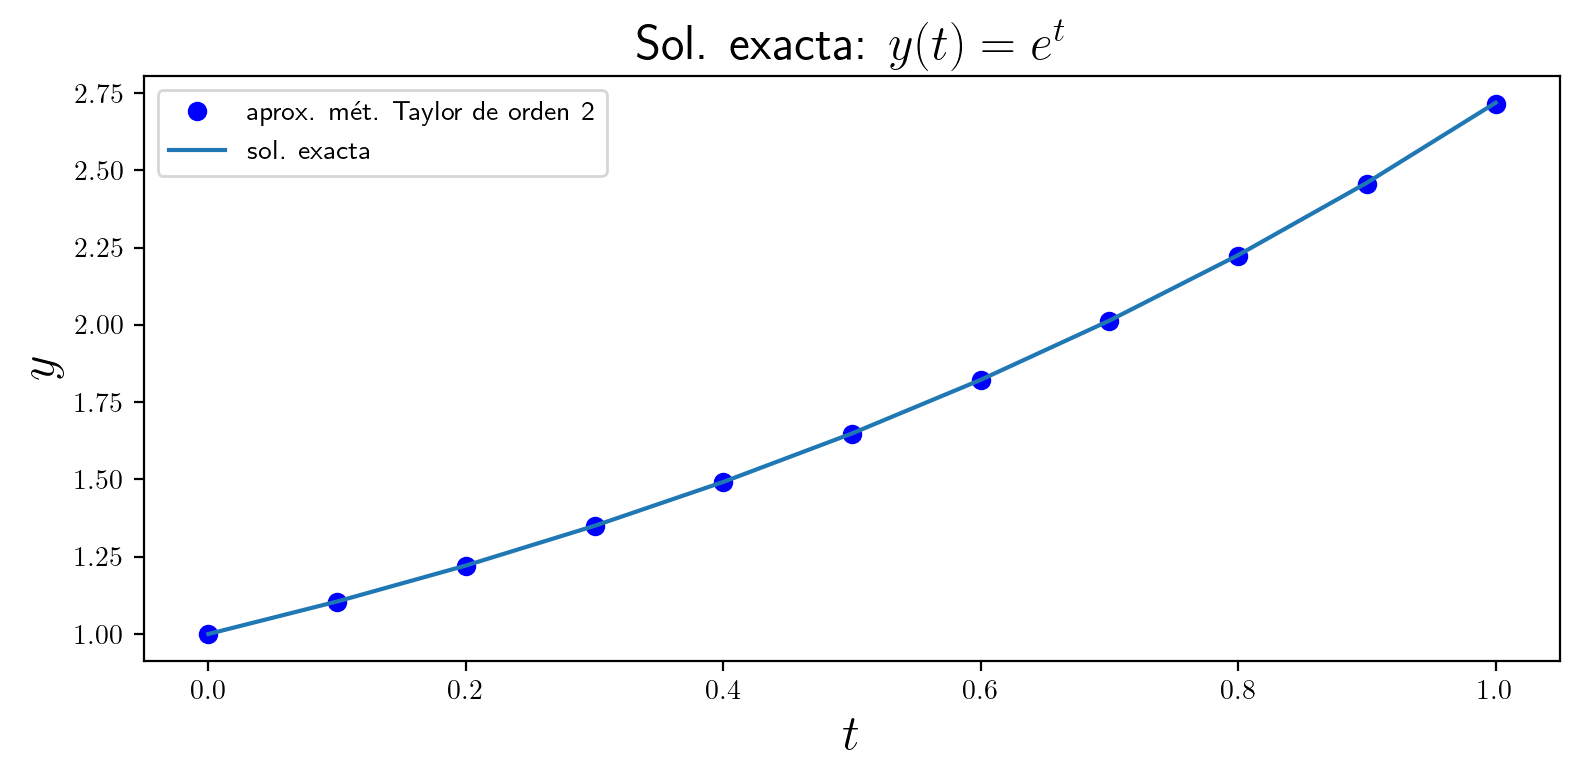

In [77]:
# que justo a continuación podremos dibujar y comparar con la sol. exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yTaylor2, 'bo',label = "aprox. mét. Taylor de orden 2")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_ptomedio = fig

**Ejercicios:**
1. Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.
 
1. A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

# Métodos de Runge-Kutta

## Runge-Kutta de orden 4

In [78]:
%%file RK4.py
## módulo RK4
''' Método de Runge-Kutta de cuarto orden para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,h).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):
    
    def RK4(F,xn,yn,h):
        K1 = F(xn,yn)
        K2 = F(xn + h/2, yn + K1*h/2)
        K3 = F(xn + h/2, yn + K2*h/2)
        K4 = F(xn + h  , yn + K3*h)
        return (K1 + 2*K2 + 2*K3 + K4)/6    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK4(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

Overwriting RK4.py


In [79]:
import RK4
# importlib.reload(RK4)

In [80]:
# Apliquemos pues ahora este algoritmo del método de Euler
N=10;  # con un valor concreto de n
xx, yRK4 = RK4.integrate(f,a,ya,b,N)
# y asignémosle los arrays que devuelve a las abcisas y ordenadas

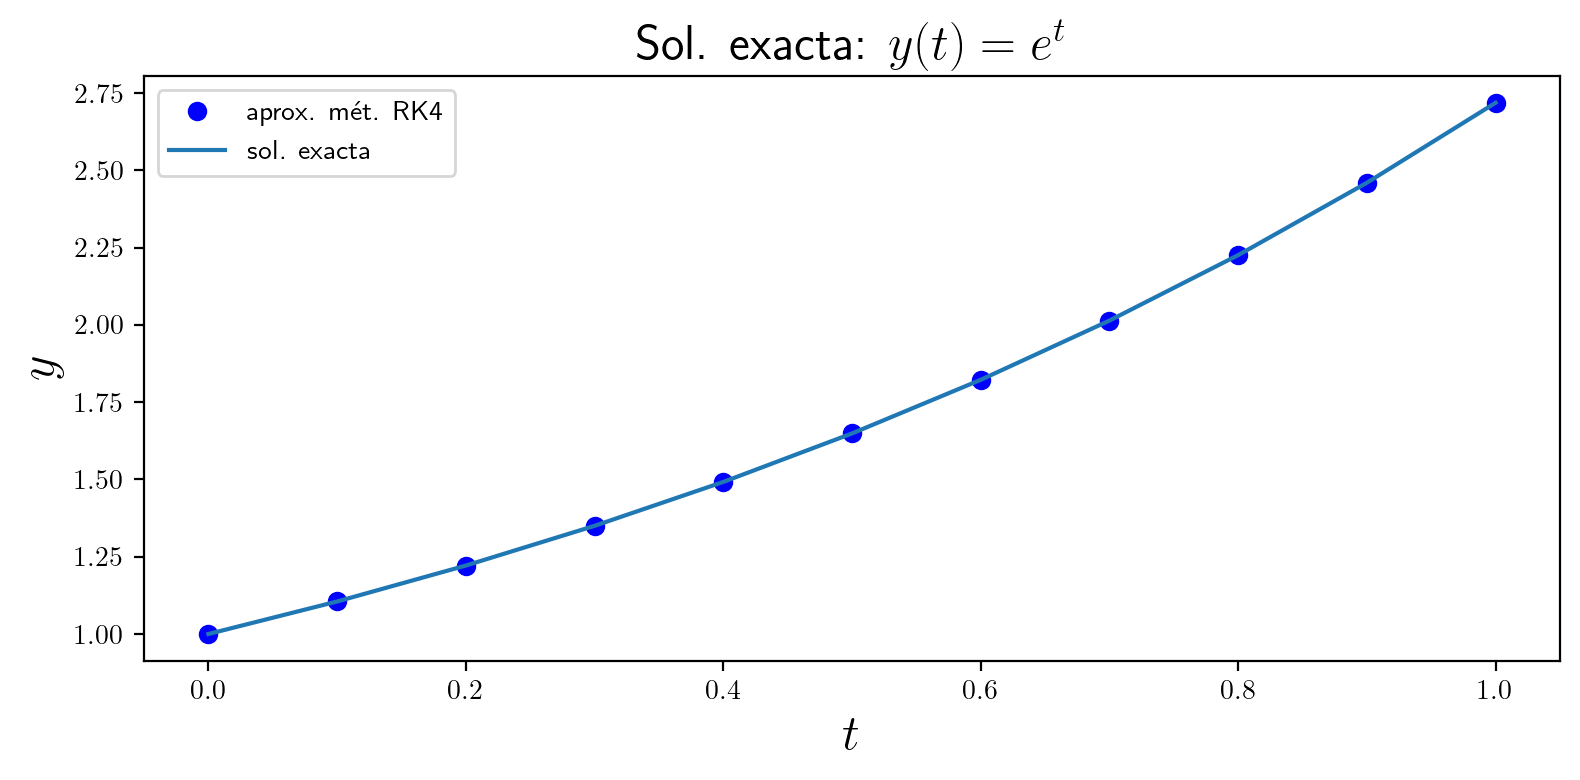

In [81]:
# que justo a continuación podremos dibujar y comparar con la sol. exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yRK4, 'bo',label = "aprox. mét. RK4")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_RK4 = fig

**Ejercicios:**
1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 
1. A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.

# Métodos Multipaso Lineales (MML)

Recordamos que un método multipaso (con $k$ pasos) para el PVI considerado en esta práctica, tendría la siguiente forma:
$$
y_0, y_1, \ldots, y_{k-1} \text{ valores iniciales de partida}\\
y_{n+k} = \sum_{j=0}^{k-1} \alpha_j \, y_{n+j} + h\, \Phi(y_{n+k}, y_{n+k-1}, \ldots, y_{n};\, t_n,\, h)
$$
donde la función $\Phi$ cumple una condición de Lipschitz adecuada.

Se dirá que uno de estos métodos se trata de un Método Multipaso Lineal (MML) si además la expresión que define el cálculo de $y_{n+k}$ se puede escribir de la siguiente manera:
$$
y_{n+k} = \sum_{j=0}^{k-1} \alpha_j \, y_{n+j} + h\,  \sum_{j=0}^{k} \beta_j \, f_{n+j}
$$
usando la notación   $\ f_i\equiv f(t_i,y_i)$.

Por otra parte, si $\alpha_0=0=\beta_0$ evidentemente, ya el método dejaría de ser de $k$ pasos, por lo que exigiremos que $|\alpha_0|+|\beta_0|\neq 0$, tratándose de un método explícito si $\beta_0=0$, e implícito en caso contrario.

## MML basados en cuadraturas

Usando las fórmulas clásicas habituales de integración numérica, de tipo interpolatorio, podríamos diseñar innumerables nuevos métodos de resolución numérica de problemas de PVI de tipo MML, partiendo de que la ecuación diferencial de partida $y'(t)=f(t,y(t))$ se puede expresar también de forma equivalente, como 
$$y(\tau_2)-y(\tau_1)=\int_{\tau_1}^{\tau_2} f(s,y(s))\, ds, \; \forall \tau_1, \, \tau_2 \in [a,b],$$ 
entonces podremos también escribir, $\forall 1\leq q \leq k$, notando $f_j\equiv f(t_j,y_j)$,
$$y(t_{n+k}) = y(t_{n+k-q}) + \int_{t_{n+k-q}}^{t_{n+k}} f(s,y(s))\, ds \\
\approx  y(t_{n+k-q}) + h\, \sum_{j=m}^{k-r} \beta_j \, f_{n+j}
$$
que será implícito si $r=0$, y explícito en cualquier otro caso. Y para que el método resultante sea efectivamente de $k$ pasos, deberá de aparecer por algún lado el término $y_n$, por lo que necesariamente $q=k$, o bien $m=0$.

Dependiendo ahora de los valores de $q,\, m, \, r$ surgen algunas conocidas familias de métodos, que revisaremos a continuación.

## Métodos de tipo Adams

Son aquellos con $q=1$, y por tanto $m=0$; y se podrían expresar como sigue:

$$ y_{n+k} = y_{n+k-1} + h\, (\beta_0\, f_n + \ldots + \beta_{k-r}\, f_{n+k-r})
$$

### Métodos de tipo Adams-Bashforth (AB)

Son métodos de tipo Adams explícitos, con exactitud máxima, y valores $q=1,\, m=0,\, r=1$.

Por ejemplo, 
- con $k=1$ tendríamos de nuevo el método de Euler: $y_{n+1} = y_{n} + h\, f_n$
- y con $k=2$: $y_{n+2} = y_{n+1} + \frac{h}{2} (3 f_{n+1} - f_{n})$

In [82]:
%%file AdamBashforth2.py
## módulo AB2
''' Método de Adams-Bashforth (con k = 2) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AB2(F,x0,y0,y1,h):
        return (3*F(x0+h,y1)-F(x0,y0))/2    
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n+1] + h*AB2(F,X[n],Y[n],Y[n+1],h))
    return np.array(X),np.array(Y)

Overwriting AdamBashforth2.py


In [83]:
import AdamBashforth2

In [84]:
# Si posteriormente tuviéramos que volver a importarlo, con Pyhton 3
# import importlib    # necesitaríamosimportar previamente este módulo
# importlib.reload(AdamBashforth2) #y ya podríamos cargarlo de nuevo cuando queramos
# importlib.reload(eulerimplicito) # 

In [85]:
# Apliquemos pues ahora este algoritmo del método de Euler
N=10;  # con un valor concreto de n
xx, yAB2 = AdamBashforth2.integrate(f,a,ya,b,N)
# y asignémosle los arrays que devuelve a las abcisas y ordenadas

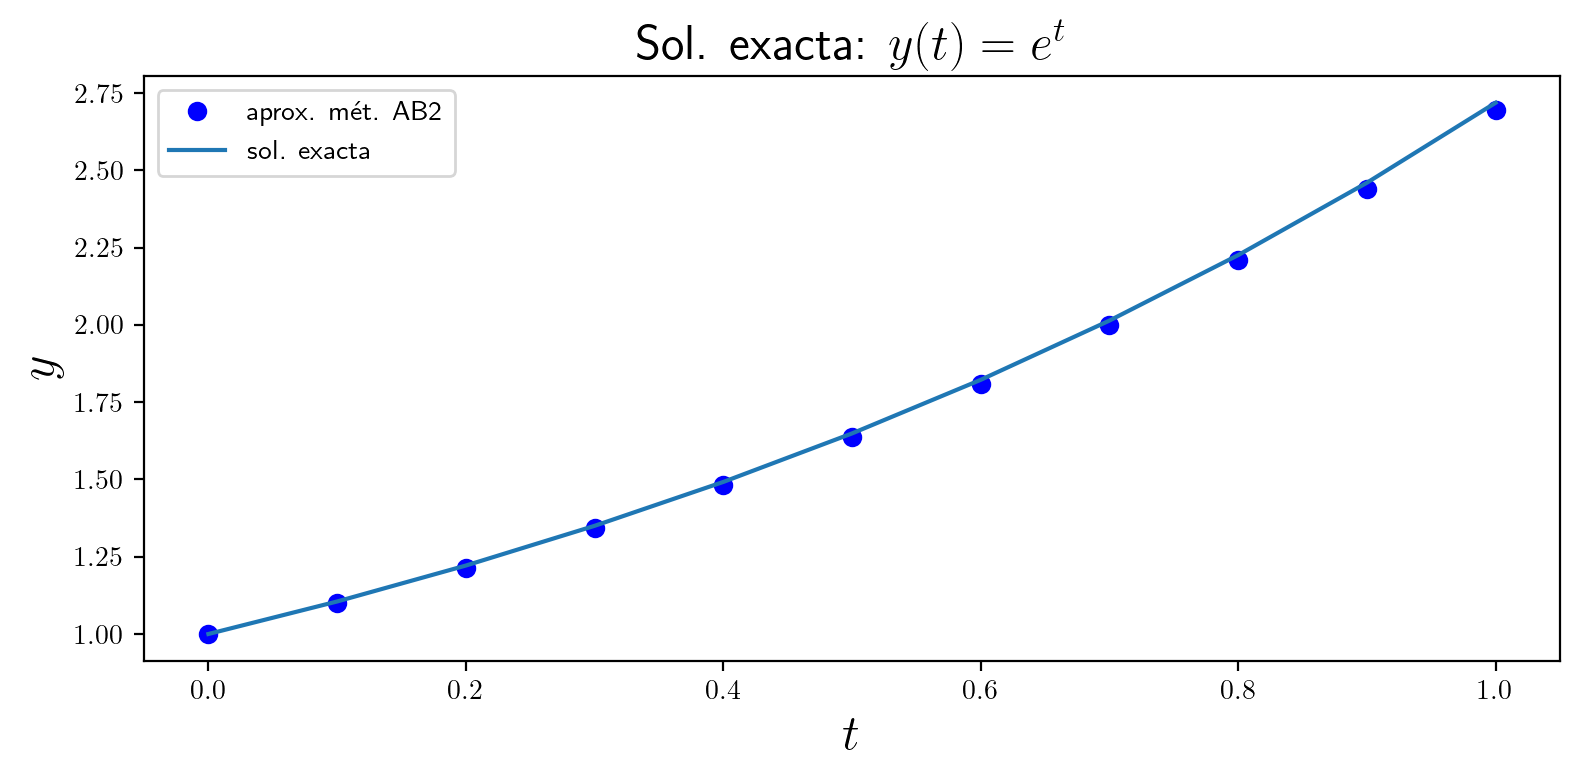

In [86]:
# que justo a continuación podremos dibujar y comparar con la sol. exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,yAB2, 'bo',label = "aprox. mét. AB2")
ax.plot(xx, y_x(xx), label="sol. exacta")
ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_AB2 = fig

**Ejercicios:**
1. A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

## Métodos Predictor-Corrector

### Método de Adams-Bashforth-Moulton de orden 5

Implementaremos a continuación un método MML Predictor-Corrector particular, combinando un predictor AB de 5 pasos con un corrector AM de 4, y aplicando una sólo corrección en cada iteración:

P: $y_{n+5}^{(0)} = y_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)$

C$^1$: $y_{n+5} = y_{n+4} + \frac{h}{720} (251 f(t_{n+5},y_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1}$ 

**Ejercicios:**
1. Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.

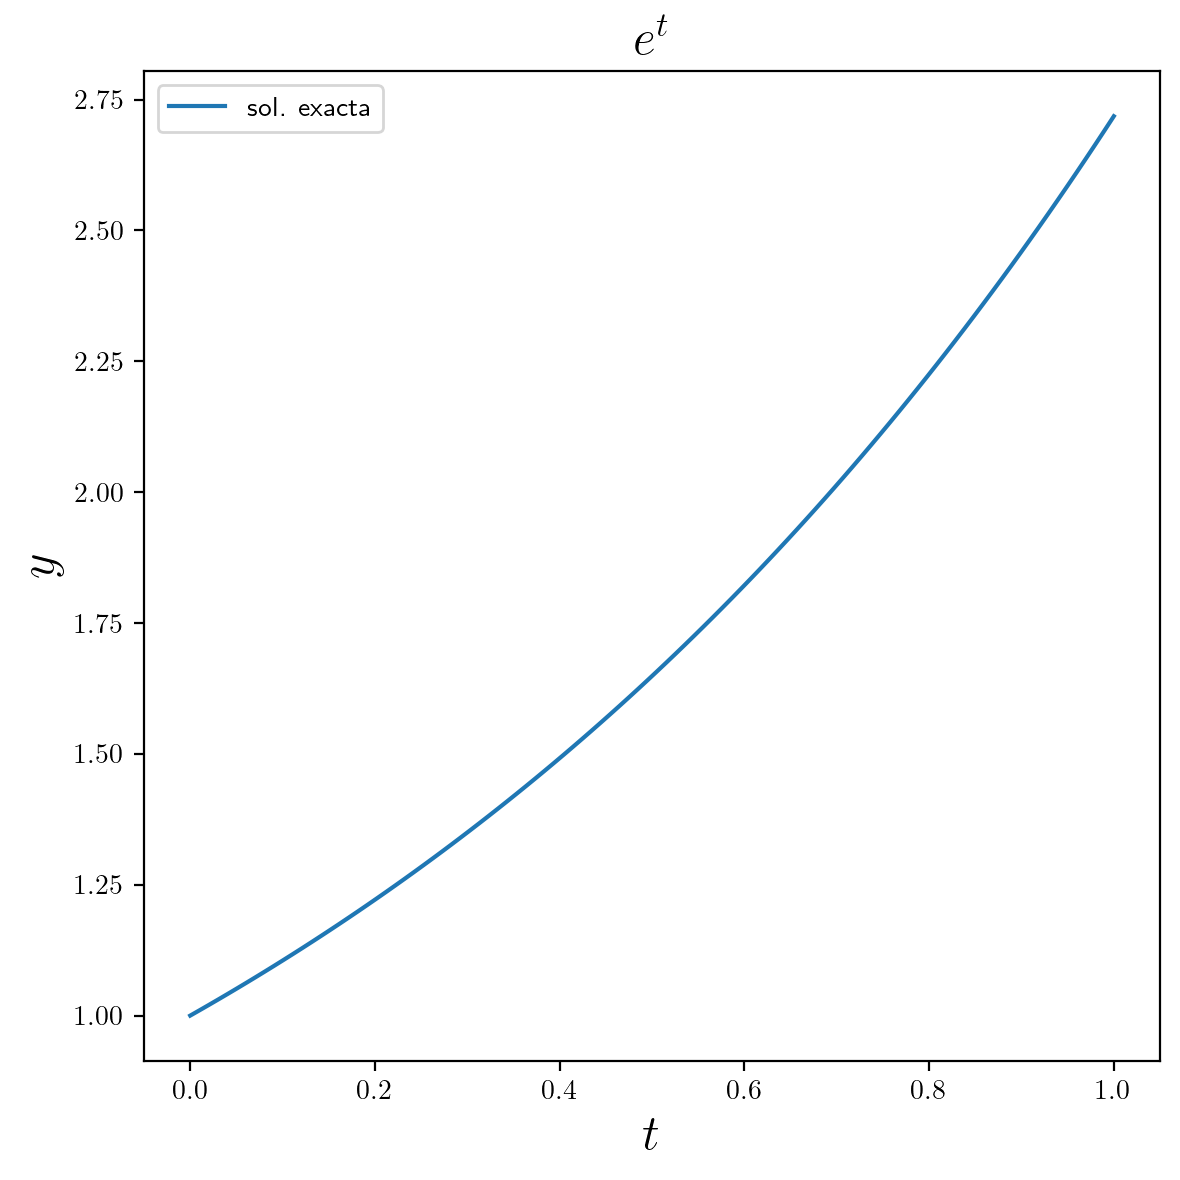

In [87]:
graf_exacta

In [88]:
a,b

(0, 1)

In [89]:
ya

1

In [90]:
import eulerexplrapido

In [91]:
help(eulerexplrapido)

Help on module eulerexplrapido:

NAME
    eulerexplrapido

DESCRIPTION
    método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,x1,h).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1]}.
    x0,y0   = condiciones iniciales 
    x1      = valor final de la variable x0 + h en este caso
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario

FUNCTIONS
    integrate(F, x0, y0, h)

FILE
    c:\users\julian\desktop\mnii\material alberto\prácticas prado\03 pvi\eulerexplrapido.py




In [92]:
?f

In [93]:
f(t,z)

z

In [94]:
N =10
x = np.linspace(a,b,N+1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [95]:
h = (b-a)/N
eulerexplrapido.integrate(f,a,ya,h)

1.1

In [96]:
Y = [ya]; k=5;
for n in range(k-1):
    y1 = eulerexplrapido.integrate(f,x[n],Y[n],h)
    Y.append(y1)
Y    

[1, 1.1, 1.2100000000000002, 1.3310000000000002, 1.4641000000000002]

In [97]:
N-k

5

In [98]:
for n in range(N-k+1):
    yn5P = Y[n+4]+h/720*(1901*f(x[n+4],Y[n+4])-2774*f(x[n+3],Y[n+3])+2616*f(x[n+2],Y[n+2])-1274*f(x[n+1],Y[n+1])+251*f(x[n],Y[n]))
    yn5C = Y[n+4]+h/720*(251*f(x[n+5],yn5P)+646*f(x[n+4],Y[n+4])-264*f(x[n+3],Y[n+3])+106*f(x[n+2],Y[n+2])+19*f(x[n+1],Y[n+1]))
    Y.append(yn5C)
Y

[1,
 1.1,
 1.2100000000000002,
 1.3310000000000002,
 1.4641000000000002,
 1.6237709429996143,
 1.8011831305013875,
 1.9976837012095712,
 2.21563604258592,
 2.457360674093428,
 2.725455819037153]

In [99]:
len(x), len(Y)

(11, 11)

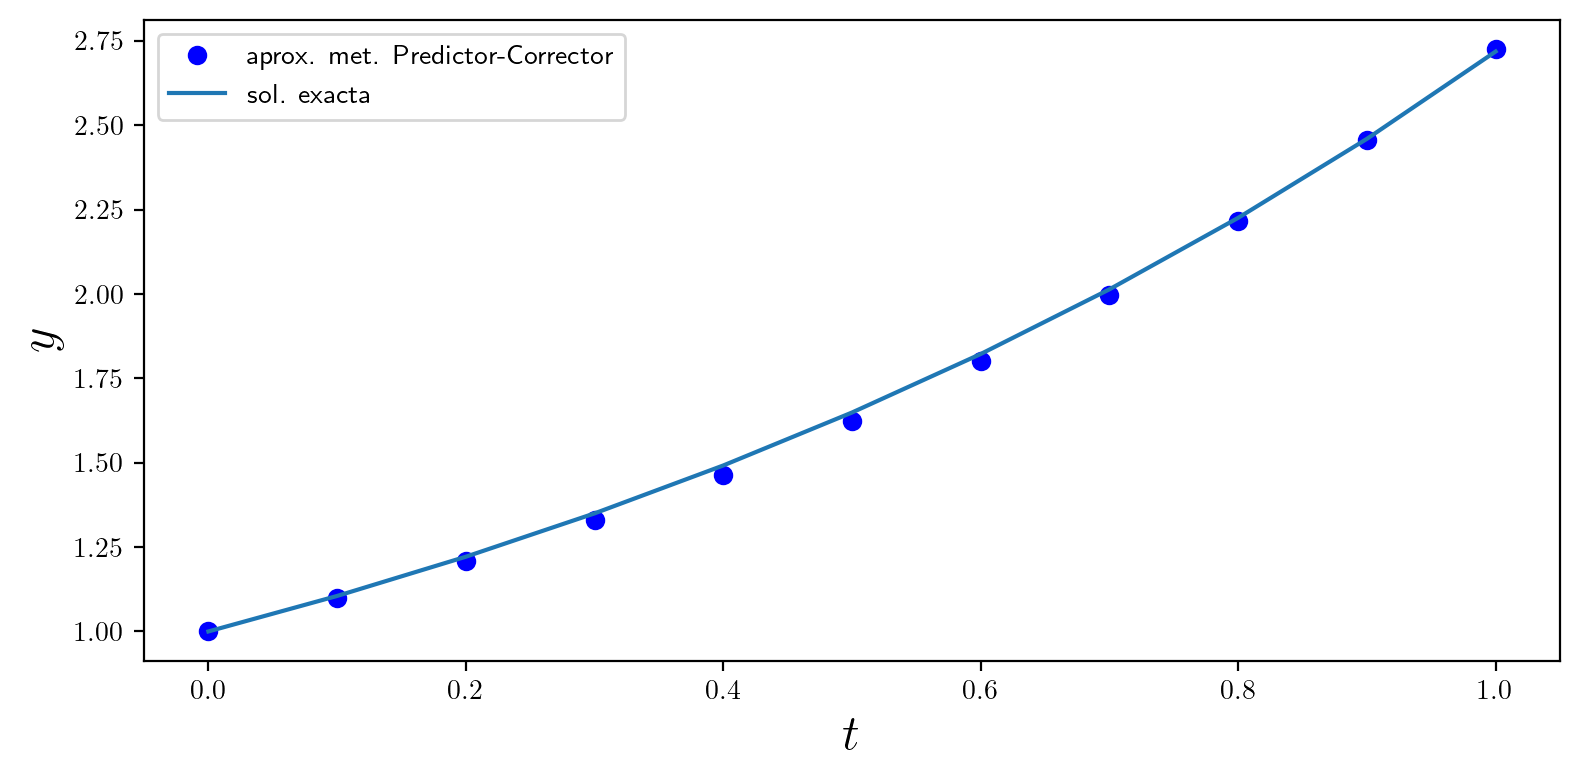

In [100]:
# que justo a continuación podremos dibujar y comparar con la sol. exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx,Y, 'bo',label = "aprox. met. Predictor-Corrector")
ax.plot(xx, y_x(xx), label="sol. exacta")
# ax.set_title(r"Sol. exacta:  $y(t)=%s$" % sp.latex(sol_exacta), fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_ptomedio = fig

## Integración Numerica de EDOs y sistemas de Ecs. Diferenciales usando SciPy  (Opcional)

In [101]:
from scipy import integrate

In [102]:
%matplotlib inline
# %config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True

In [103]:
import numpy as np
import sympy as sp
# sp.init_printing()

In [104]:
x = sp.symbols("x")

In [105]:
y = sp.Function("y")

In [106]:
f = y(x)**2 + x

In [107]:
f_np = sp.lambdify((y(x), x), f, 'math')

In [108]:
y0 = 0

In [109]:
xp = np.linspace(0, 1.9, 100)

In [110]:
xp.shape

(100,)

In [111]:
yp = integrate.odeint(f_np, y0, xp)

In [112]:
xm = np.linspace(0, -5, 100)

In [113]:
ym = integrate.odeint(f_np, y0, xm)

In [114]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sp.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

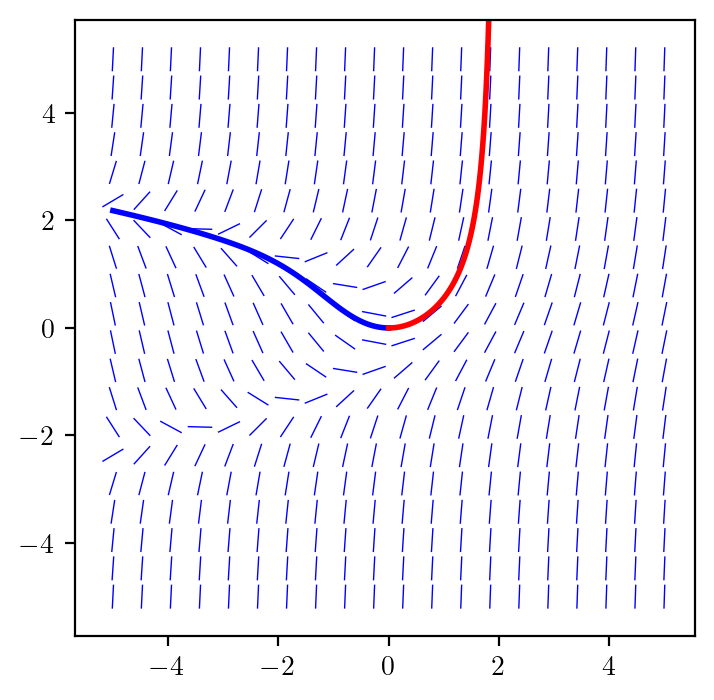

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2);
# fig.savefig('odeint-ejemplo-ec-escalar.pdf')

## Ecuaciones de Lotka-Volterra para poblaciones de tipo presa/predador

$$
x'(t) = a x - b x y
$$

$$
y'(t) = c x y - d y
$$

In [116]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7

In [117]:
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y,
            c * x * y - d * y]

In [118]:
xy0 = [600, 400]

In [119]:
t = np.linspace(0, 50, 250)

In [120]:
xy_t = integrate.odeint(f, xy0, t)

In [121]:
xy_t.shape

(250, 2)

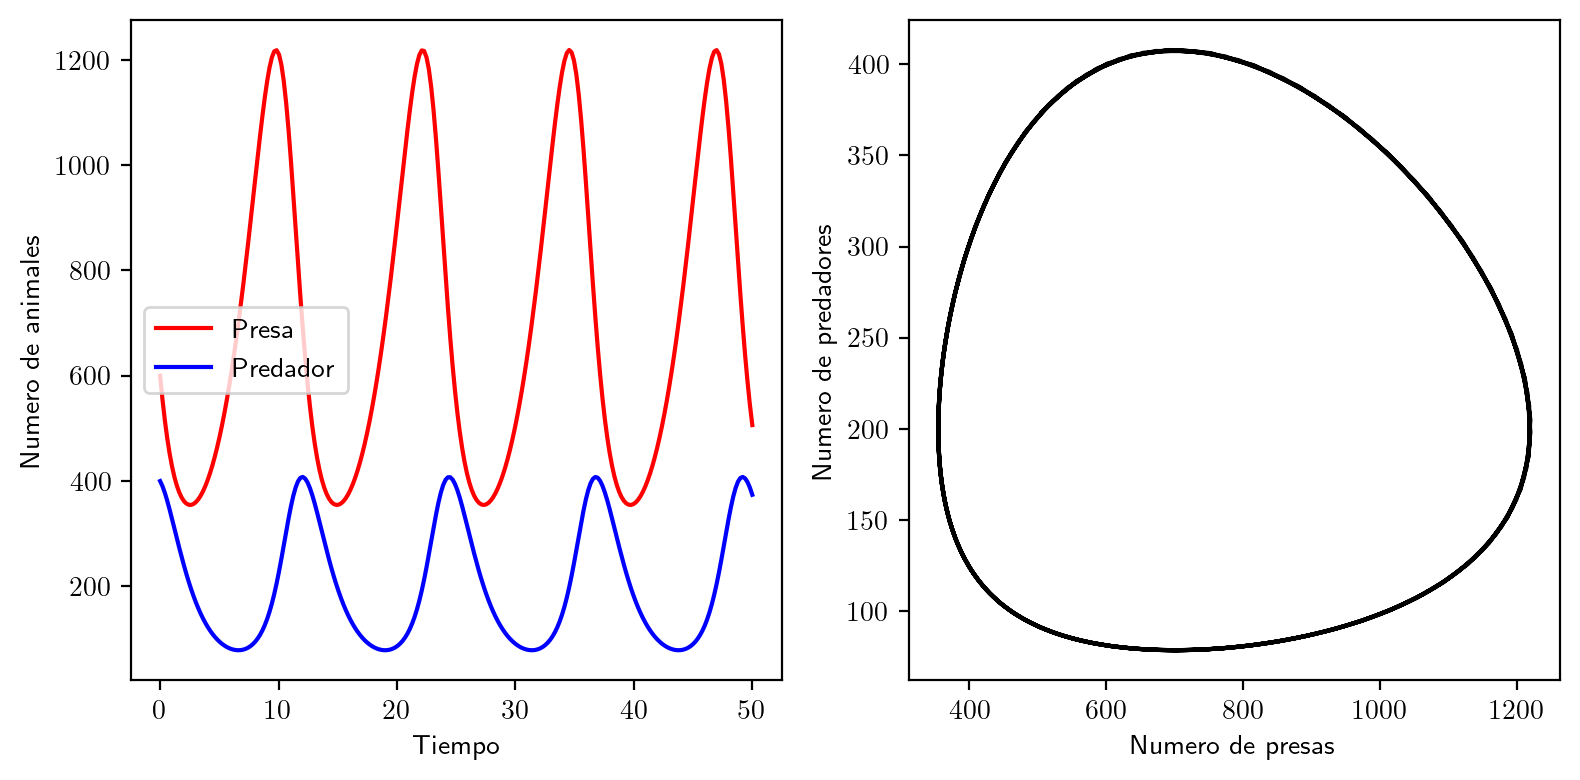

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(t, xy_t[:,0], 'r', label="Presa")
axes[0].plot(t, xy_t[:,1], 'b', label="Predador")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Numero de animales")
axes[0].legend()

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Numero de presas")
axes[1].set_ylabel("Numero de predadores")
fig.tight_layout()
fig.savefig('cap9-lokta-volterra.pdf')

## Ecuaciones de Lorenz

$$
x'(t) = \sigma(y - x)
$$
$$
y'(t) = x(\rho - z) - y 
$$
$$
z'(t) = x y - \beta z
$$

In [123]:
def f(xyz, t, rho, sigma, beta):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

In [124]:
rho = 28
sigma = 8
beta = 8/3.0

In [125]:
t = np.linspace(0, 25, 10000)

In [126]:
xyz0 = [1.0, 1.0, 1.0]

In [127]:
xyz1 = integrate.odeint(f, xyz0, t, args=(rho, sigma, beta))

In [128]:
xyz2 = integrate.odeint(f, xyz0, t, args=(rho, sigma, 0.6*beta))

In [129]:
xyz3 = integrate.odeint(f, xyz0, t, args=(rho, 2*sigma, 0.6*beta))

In [130]:
xyz3.shape

(10000, 3)

In [131]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

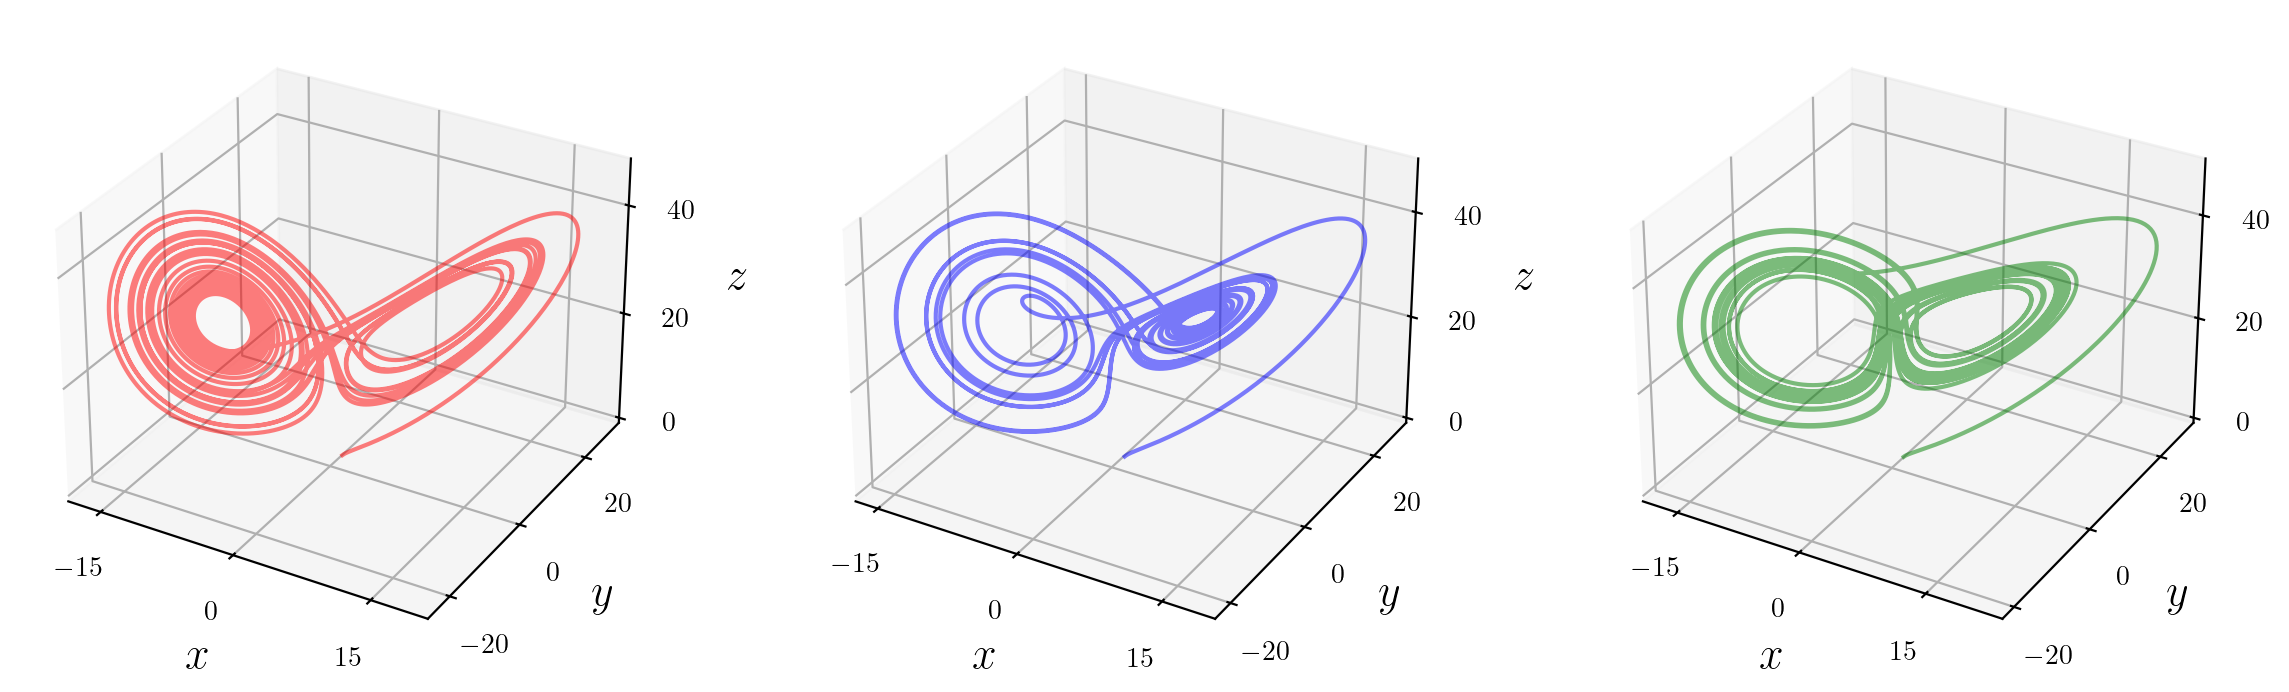

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

fig.tight_layout()
fig.savefig('cap9-ecuaciones_Lorentz.pdf')

## Muelles acoplados y amortigüados

Como ecuaciones de segundo orden:

\begin{eqnarray}
m_1 x_1''(t) + \gamma_1 x_1'(t) + k_1 (x_1(t) - l_1) - k_2 (x_2(t) - x_1(t) - l_2) &=& 0\\
m_2 x_2''(t) + \gamma_2 x_2' + k_2 (x_2 - x_1 - l_2) &=& 0
\end{eqnarray}

O de forma estándard:

\begin{align}
y_1'(t) &= y_2(t) \\
y_2'(t) &= -\gamma_1/m_1 y_2(t) - k_1/m_1 (y_1(t) - l_1) + k_2 (y_3(t) - y_1(t) - l_2)/m_1 \\
y_3'(t) &= y_4(t) \\
y_4'(t) &= - \gamma_2 y_4(t)/m_2 - k_2 (y_3(t) - y_1(t) - l_2)/m_2 \\
\end{align}

In [133]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [y[1], 
            - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1], 
            y[3], 
            - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3] ]

In [134]:
m1, k1, g1 = 1.0, 10.0, 0.5

In [135]:
m2, k2, g2 = 2.0, 40.0, 0.25

In [136]:
args = (m1, k1, g1, m2, k2, g2)

In [137]:
y0 = [1.0, 0, 0.5, 0]

In [138]:
t = np.linspace(0, 20, 1000)

In [139]:
r = integrate.ode(f)

In [140]:
r.set_integrator('lsoda');

In [141]:
r.set_initial_value(y0, t[0]);

In [142]:
r.set_f_params(args);

In [143]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

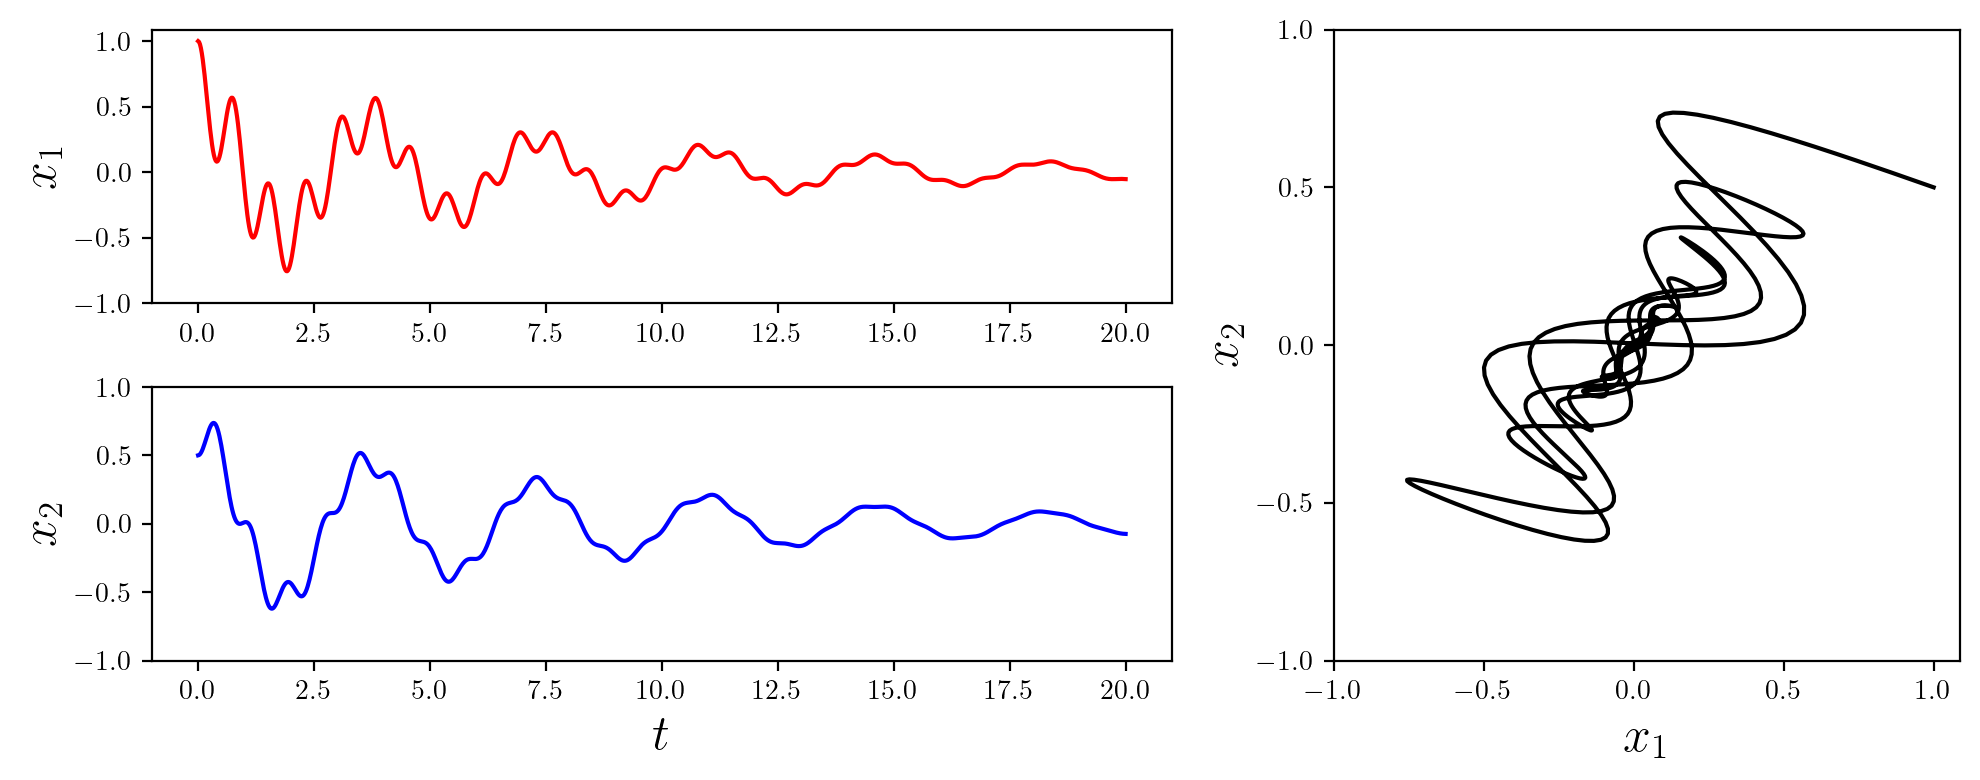

In [144]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()
# fig.savefig('cap9-muelles-acoplados.pdf')

#### Realicemos ahora el mismo cálculo anterior, pero especificando también el Jacobiano:

In [145]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [[0, 1, 0, 0], 
            [- k1/m1 - k2/m1, - g1/m1 * y[1], k2/m1, 0],
            [0, 0, 1, 0],
            [k2/m2, 0, - k2/m2, - g2/m2]]

In [146]:
r = integrate.ode(f, jac).set_f_params(args).set_jac_params(args).set_initial_value(y0, t[0])

In [147]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

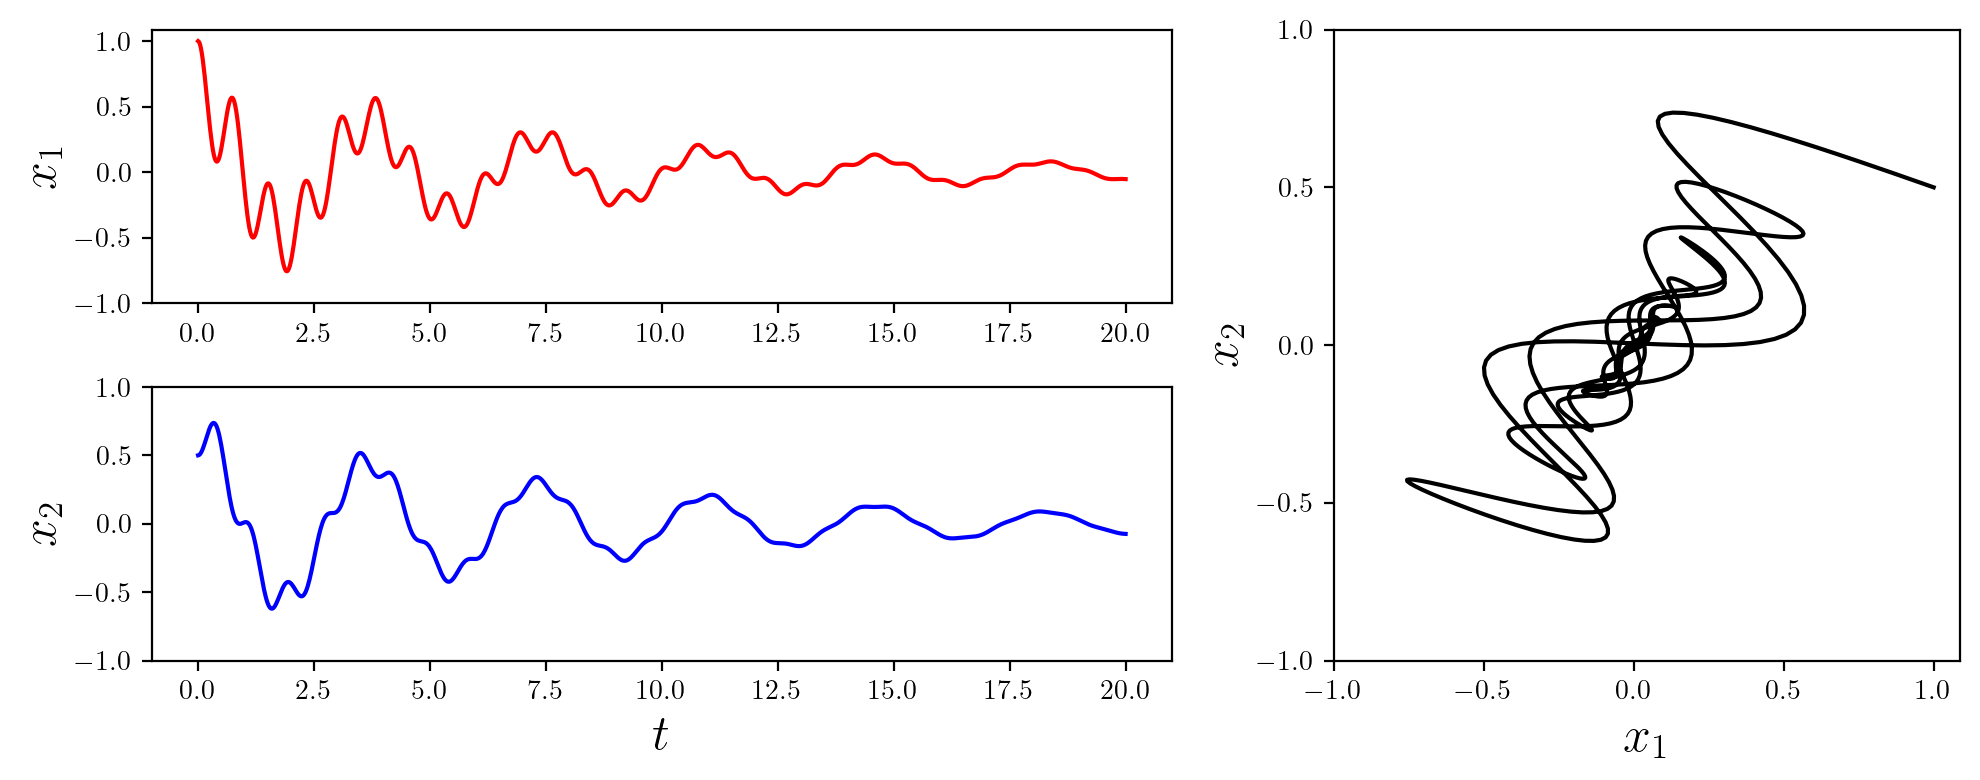

In [148]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()

### Mismos cálculos, pero usando previamente SymPy para definir el problema para SciPy

In [149]:
L1 = L2 = 0
t = sp.symbols("t")
m1, k1, b1 = sp.symbols("m_1, k_1, b_1")
m2, k2, b2 = sp.symbols("m_2, k_2, b_2")

In [150]:
x1 = sp.Function("x_1")
x2 = sp.Function("x_2")

In [151]:
ode1 = sp.Eq(m1 * x1(t).diff(t,t,) + b1 * x1(t).diff(t) + k1*(x1(t)-L1) - k2*(x2(t)-x1(t) - L2),0)

In [152]:
ode2 = sp.Eq(m2 * x2(t).diff(t,t,) + b2 * x2(t).diff(t) + k2*(x2(t)-x1(t)-L2),0)

In [153]:
params = {m1: 1.0, k1: 10.0, b1: 0.5,
          m2: 2.0, k2: 40.0, b2: 0.25}

In [154]:
args

(1.0, 10.0, 0.5, 2.0, 40.0, 0.25)

In [155]:
y1 = sp.Function("y_1")
y2 = sp.Function("y_2")
y3 = sp.Function("y_3")
y4 = sp.Function("y_4")

In [156]:
varchange = {x1(t).diff(t, t): y2(t).diff(t), 
             x1(t): y1(t),
             x2(t).diff(t, t): y4(t).diff(t), 
             x2(t): y3(t)}

In [157]:
(ode1.subs(varchange).lhs, ode2.subs(varchange).lhs)

(b_1*Derivative(y_1(t), t) + k_1*y_1(t) - k_2*(-y_1(t) + y_3(t)) + m_1*Derivative(y_2(t), t),
 b_2*Derivative(y_3(t), t) + k_2*(-y_1(t) + y_3(t)) + m_2*Derivative(y_4(t), t))

In [158]:
ode3 = y1(t).diff(t) - y2(t)

In [159]:
ode4 = y3(t).diff(t) - y4(t)

In [160]:
vcsol = sp.solve((ode1.subs(varchange), ode2.subs(varchange), ode3, ode4),
                    (y1(t).diff(t), y2(t).diff(t), y3(t).diff(t), y4(t).diff(t)))

In [161]:
vcsol

{Derivative(y_1(t), t): y_2(t),
 Derivative(y_2(t), t): -b_1*y_2(t)/m_1 - k_1*y_1(t)/m_1 - k_2*y_1(t)/m_1 + k_2*y_3(t)/m_1,
 Derivative(y_3(t), t): y_4(t),
 Derivative(y_4(t), t): -b_2*y_4(t)/m_2 + k_2*y_1(t)/m_2 - k_2*y_3(t)/m_2}

In [162]:
ode_rhs = sp.Matrix([y1(t).diff(t), y2(t).diff(t), y3(t).diff(t), y4(t).diff(t)]).subs(vcsol)

In [163]:
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])

In [164]:
sp.Eq(y.diff(t), ode_rhs)

Eq(Matrix([
[Derivative(y_1(t), t)],
[Derivative(y_2(t), t)],
[Derivative(y_3(t), t)],
[Derivative(y_4(t), t)]]), Matrix([
[                                                            y_2(t)],
[-b_1*y_2(t)/m_1 - k_1*y_1(t)/m_1 - k_2*y_1(t)/m_1 + k_2*y_3(t)/m_1],
[                                                            y_4(t)],
[                 -b_2*y_4(t)/m_2 + k_2*y_1(t)/m_2 - k_2*y_3(t)/m_2]]))

In [165]:
f_np = sp.lambdify((t, y), ode_rhs.subs(params), 'numpy')

In [166]:
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

r = integrate.ode(f_np)
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);

dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

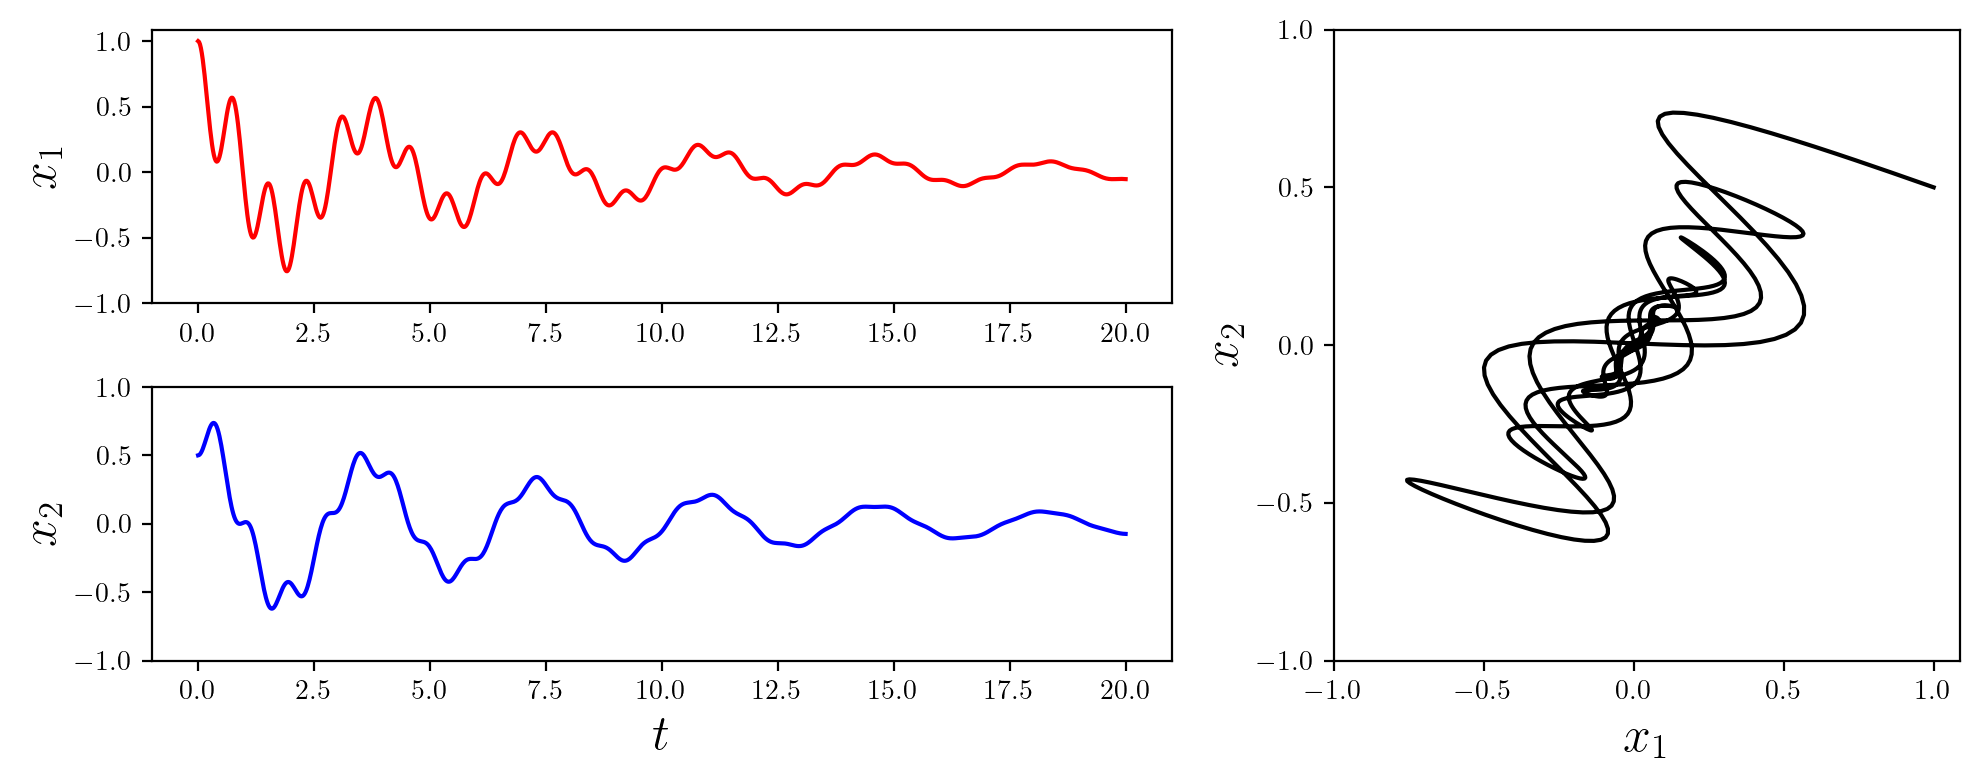

In [167]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()

## Doble péndulo

http://scienceworld.wolfram.com/physics/DoublePendulum.html

$$
(m_1+m_2) l_1\theta_1'' + m_2l_2\theta_2''\cos(\theta_1-\theta_2)
+ m_2l_2(\theta_2')^2\sin(\theta_1-\theta_2)+g(m_1+m_2)\sin(\theta_1) = 0
$$

$$
m_2l_2\theta_2'' + m_2l_1\theta_1''\cos(\theta_1-\theta_2) - m_2l_1 (\theta_1')^2 \sin(\theta_1-\theta_2)
+m_2g\sin(\theta_2) = 0
$$

In [168]:
t, g, m1, l1, m2, l2 = sp.symbols("t, g, m_1, l_1, m_2, l_2")

In [169]:
theta1, theta2 = sp.symbols("theta_1, theta_2", cls=sp.Function)

In [170]:
ode1 = sp.Eq((m1+m2)*l1 * theta1(t).diff(t,t) +
                m2*l2 * theta2(t).diff(t,t) +
                m2*l2 * theta2(t).diff(t)**2 * sp.sin(theta1(t)-theta2(t)) + 
                g*(m1+m2) * sp.sin(theta1(t)),0)
ode1

Eq(g*(m_1 + m_2)*sin(theta_1(t)) + l_1*(m_1 + m_2)*Derivative(theta_1(t), (t, 2)) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

In [171]:
ode2 = sp.Eq(m2*l2 * theta2(t).diff(t,t) +
                m2*l1 * theta1(t).diff(t,t) * sp.cos(theta1(t)-theta2(t)) -
                m2*l1 * theta1(t).diff(t)**2 * sp.sin(theta1(t) - theta2(t)) +
                m2*g * sp.sin(theta2(t)),0)
ode2

Eq(g*m_2*sin(theta_2(t)) - l_1*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 + l_1*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), (t, 2)) + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

In [172]:
# Esto resultará infructuoso, ya que Sympy no puede resolver simbólicamente estas EDOs
try:
    sp.dsolve(ode1, ode2)
except Exception as e:
    print(e)

cannot determine truth value of Relational


In [173]:
y1, y2, y3, y4 = sp.symbols("y_1, y_2, y_3, y_4", cls=sp.Function)

In [174]:
varchange = {theta1(t).diff(t, t): y2(t).diff(t), 
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t), 
             theta2(t): y3(t)}

In [175]:
ode1_vc = ode1.subs(varchange)

In [176]:
ode2_vc = ode2.subs(varchange)

In [177]:
ode3 = y1(t).diff(t) - y2(t)

In [178]:
ode4 = y3(t).diff(t) - y4(t)

In [179]:
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])

In [180]:
vcsol = sp.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)

In [181]:
f = y.diff(t).subs(vcsol[0])

In [182]:
sp.Eq(y.diff(t), f)

Eq(Matrix([
[Derivative(y_1(t), t)],
[Derivative(y_2(t), t)],
[Derivative(y_3(t), t)],
[Derivative(y_4(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                                                 y_2(t)],
[                                                                                            (-g*m_1*sin(y_1(t)) - g*m_2*sin(y_1(t)) + g*m_2*sin(y_3(t)) - l_1*m_2*y_2(t)**2*sin(y_1(t) - y_3(t)) - l_2*m_2*y_4(t)**2*sin(y_1(t) - y_3(t)))/(l_1*(m_1 - m_2*cos(y_1(t) - y_3(t)) + m_2))],
[                                                                                                                                                                                                                                                                                 y_4(t)],
[(g*m_1*sin(2*y_1(t) - y_3(t

In [183]:
params = {m1: 5.0, l1: 2.0,
          m2: 1.0, l2: 1.0, g: 10.0}

In [184]:
f_np = sp.lambdify((t, y), f.subs(params), 'numpy')

In [185]:
jac = sp.Matrix([[fj.diff(yi) for yi in y] for fj in f])

In [186]:
jac_np = sp.lambdify((t, y), jac.subs(params), 'numpy')

In [187]:
y0 = [2.0, 0, 0.0, 0]

In [188]:
t = np.linspace(0, 20, 1000)

In [189]:
jac_np(0, y0)

array([[ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 2.54831741, -0.        ,  0.1767457 , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [-5.61099875,  0.        , -2.12094846, -0.        ]])

In [190]:
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0]);
 
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

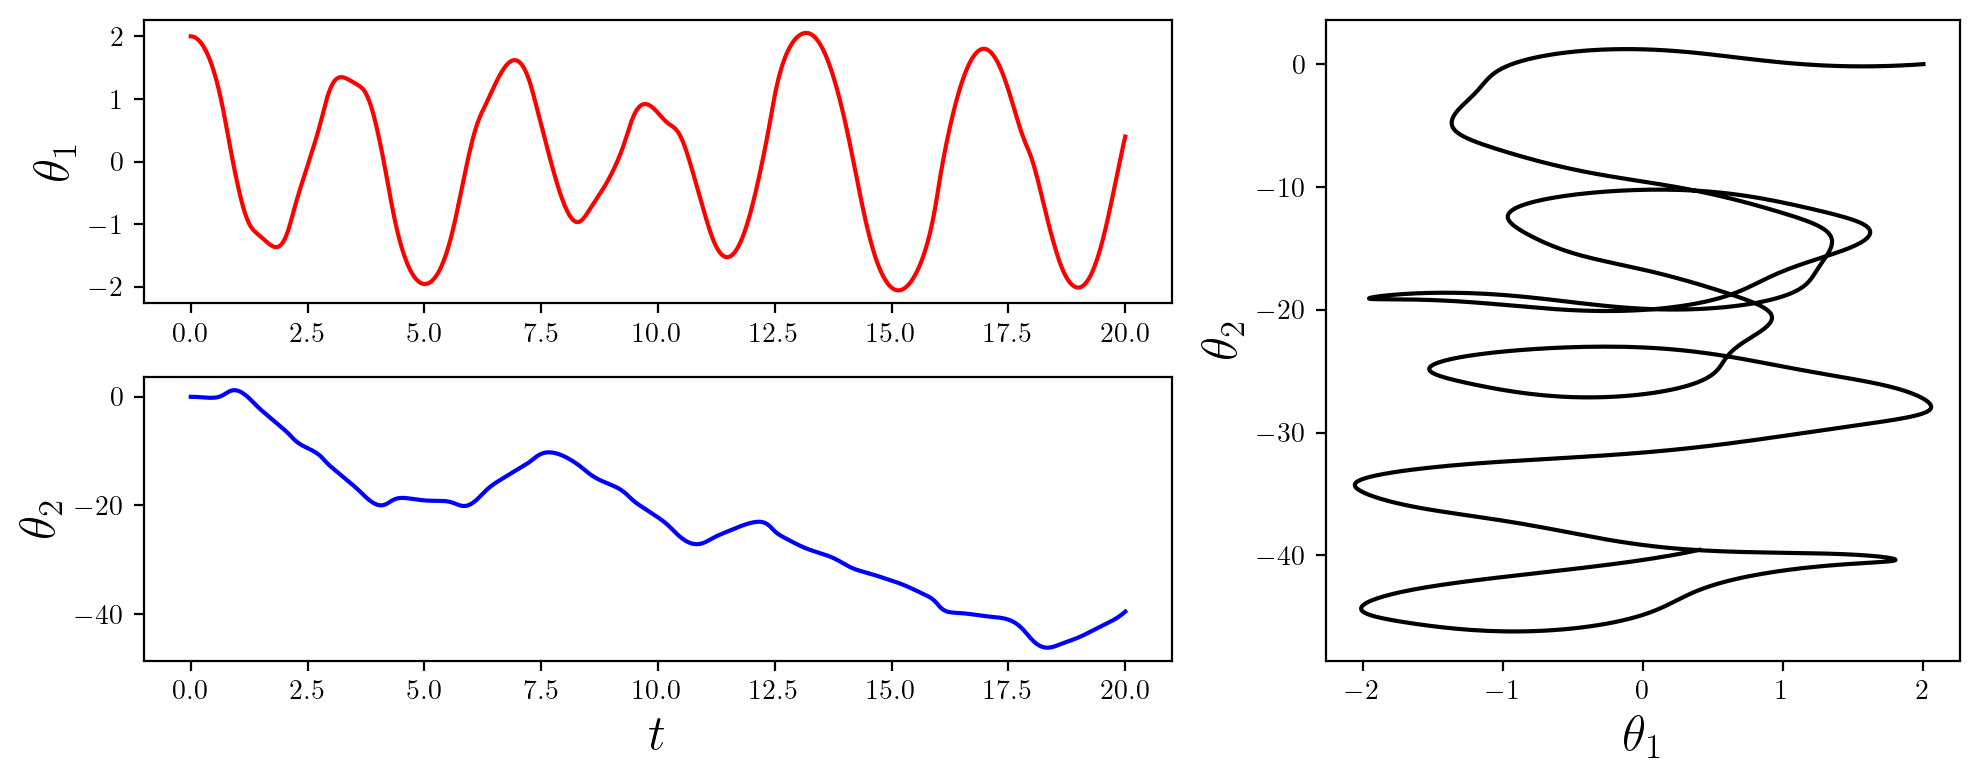

In [191]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel(r'$\theta_1$', fontsize=18)

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel(r'$\theta_2$', fontsize=18)

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel(r'$\theta_1$', fontsize=18)
ax3.set_ylabel(r'$\theta_2$', fontsize=18)

fig.tight_layout()

In [192]:
theta1_np, theta2_np = y[:, 0], y[:, 2]

In [193]:
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

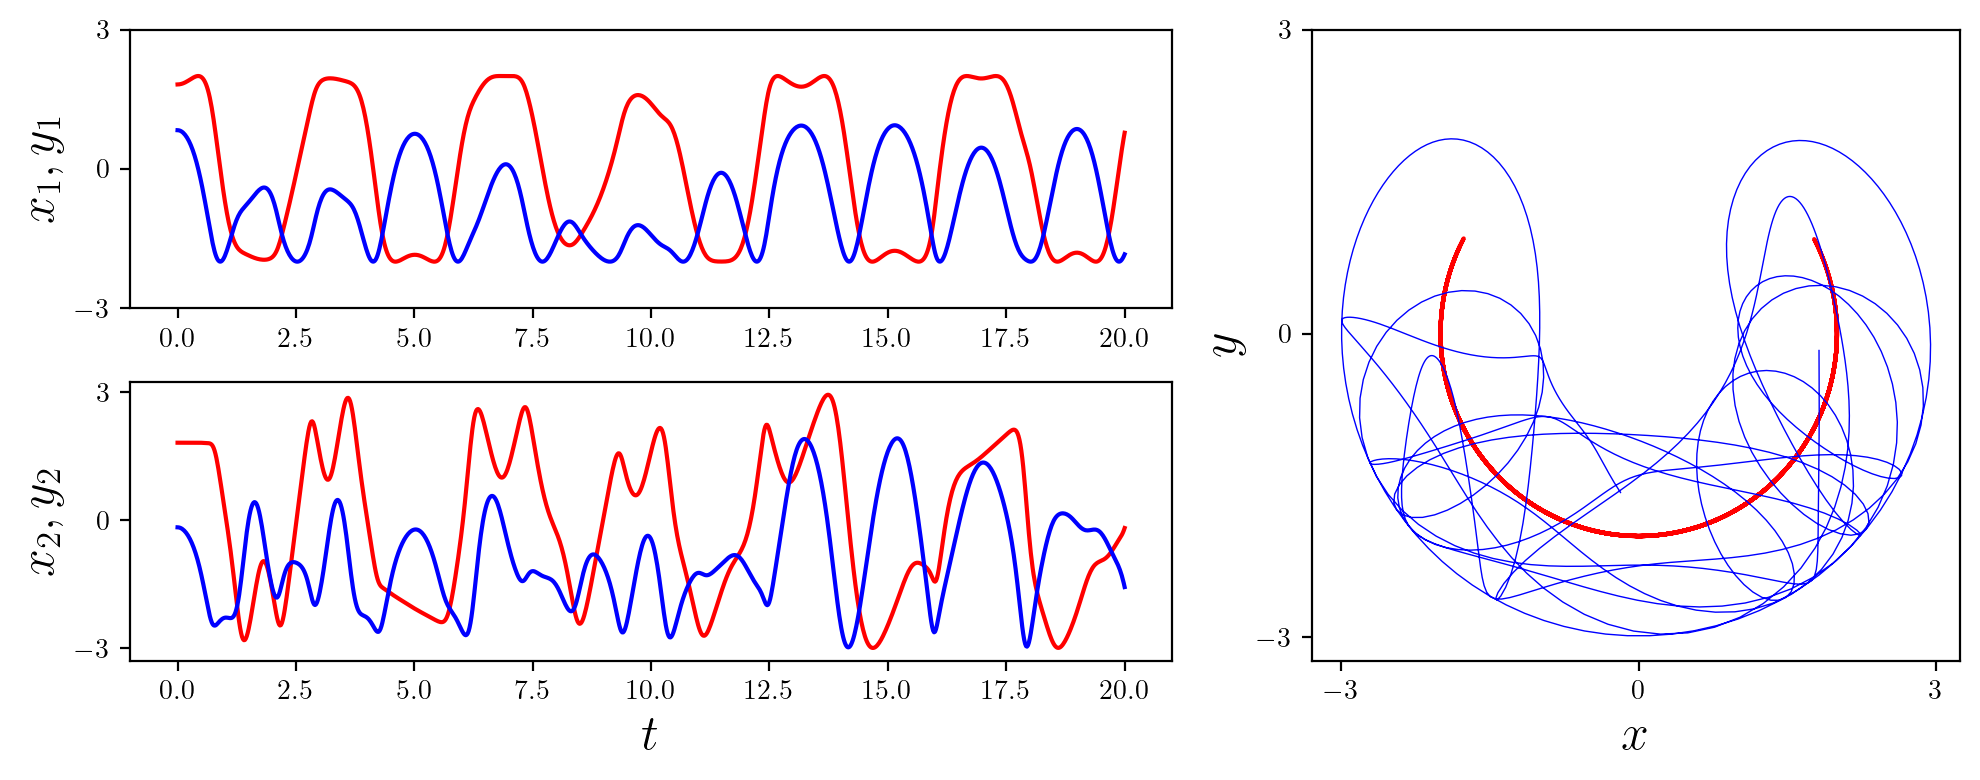

In [194]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])

fig.tight_layout()
# fig.savefig('ch9-double-pendulum.pdf')

## Versiones

In [195]:
%reload_ext version_information

In [196]:
%version_information numpy, scipy, sympy, matplotlib

Software versions
Python 3.11.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
numpy 1.26.4
scipy 1.13.0
sympy 1.12
matplotlib 3.8.4
Tue May 21 23:09:53 2024 Hora de verano romance